# Сборный проект 2

**Описание проекта:**

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

Исследование разбито на две задачи. Опишем их подробнее.

**Задача 1**

**Постановка задачи:** Необходимо построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

**Описание данных:**
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

Тренировочная выборка содержится в файле train_job_satisfaction_rate.csv. Входные признаки тестовой выборки — test_features.csv. Целевой признак тестовой выборки — test_target_job_satisfaction_rate.csv.

**План работы над задачей:**

1) **Загрузка и изучение данных** на предмет возникновения в них дубликатов, пропусков и ошибок в типах данных.

2) **Предобработка данных** — на этом этапе мы обработаем все недостатки исходных данных, найденные на предыдущем шаге.

3) **Исследовательский анализ** — детальнее ознакомимся с данными и сделаем выводы о том, как их нужно подготовить.

4) **Подготовка данных** — выполним подготовку признаков в пайплайне.

5) **Обучение моделей** — обучим как минимум две модели, после чего выберем лучшую и проверим её качество на основе метрики SMAPE.

6) Сделаем **промежуточный вывод** о том, какая модель справилась лучше и почему.

**Задача 2**

**Постановка задачи:** Необходимо построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании. Для этой задачи могут быть использованы те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

Тренировочная выборка содержится в файле train_quit.csv. Входные признаки тестовой выборки — test_features.csv. Целевой признак тестовой выборки — test_target_quit.csv.

**План работы над задачей:**

1) **Загрузка и изучение данных** на предмет возникновения в них дубликатов, пропусков и ошибок в типах данных.

2) **Предобработка данных** — на этом этапе мы обработаем все недостатки исходных данных, найденные на предыдущем шаге.

3) **Исследовательский анализ** — составим портрет "уволившегося сотрудника", а также визуализируем и сравним распределение признака job_satisfaction_rate для исследования гипотезы о связи уровня удовлетворённости сотрудника с его желанием уволиться. 

4) **Добавление нового входного признака** — добавим job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

5) **Подготовка данных** — выполним подготовку признаков в пайплайне.

6) **Обучение моделей** — обучим как минимум три модели, после чего выберем лучшую и проверим её качество на основе метрики ROC-AUC. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке.

7) Сделаем **промежуточный вывод** о том, какая модель справилась лучше и почему.

8) Сделаем **итоговый вывод** об основных итогах исследования и дадим рекомендации для бизнеса

# Импорт и настройка библиотек

In [1]:
!pip install phik -q
!pip install yellowbrick -q
!pip install optuna.integration -q
!pip install imbalanced_learn -q
!pip install scikit-learn==1.1.3 -q
!pip install shap -q
!pip install matplotlib==3.5.2 -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import phik
import shap 
import os

from scipy import stats as st
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import (make_scorer, roc_auc_score)
from sklearn.preprocessing import (
    StandardScaler, OneHotEncoder, MinMaxScaler,
    OrdinalEncoder, LabelEncoder
)
from sklearn.dummy import DummyClassifier
 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor    

In [3]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
pd.set_option('display.max_columns', None)

In [4]:
def plot_describe (t, x_l, y_l): # Заранее пропишем функцию, подписывающую название графика и осей
    plt.title(t)                 # Здесь параметр t будет отвечать за название графика  
    plt.xlabel(x_l)              # Параметр x_l — за подпись горизонтальной оси
    plt.ylabel(y_l)              # Параметр y_l — за подпись вертикальной оси
    plt.show()
    
RANDOM_STATE = 42

# Задача 1

## Загрузка данных

Считаем csv-файлы:

In [5]:
pth1 = 'C:/pr/pr_7/train_job_satisfaction_rate.csv'
pth2 = '/datasets/train_job_satisfaction_rate.csv'
pth3 = 'C:/pr/pr_7/test_features.csv'
pth4 = '/datasets/test_features.csv'
pth5 = 'C:/pr/pr_7/test_target_job_satisfaction_rate.csv'
pth6 = '/datasets/test_target_job_satisfaction_rate.csv'

if os.path.exists(pth1):
    df_train = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df_train = pd.read_csv(pth2)
else:
    print('Something is wrong')

if os.path.exists(pth3):
    df_test = pd.read_csv(pth3)
elif os.path.exists(pth4):
    df_test = pd.read_csv(pth4)
else:
    print('Something is wrong')

if os.path.exists(pth5):
    df_test_target = pd.read_csv(pth5)
elif os.path.exists(pth6):
    df_test_target = pd.read_csv(pth6)
else:
    print('Something is wrong')

Изучим общую информацию о датасетах. Однако, прежде чем мы приступим к их разбору, напишем **вспомогательную функцию**. Так проводить анализ будет быстрее и удобнее:

In [6]:
def describe_data (data):
    print('Первые пять строк таблицы:')
    display(data.head())
    print('\n', 'Последние пять строк таблицы:')
    display(data.tail())
    print('\n', 'Общая информация о датасете:', '\n')
    display(data.info())
    print('\n', 'Описательные статистики датасета:')
    display(data.describe().round(2))
    print('\n', 'Количество дубликатов в данных:')
    display(data.duplicated().sum())

In [7]:
describe_data(df_train) # Изучаем данные о тренировочной выборке

Первые пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
0  155278       sales  junior   medium                 2              no   
1  653870          hr  junior     high                 2              no   
2  184592       sales  junior      low                 1              no   
3  171431  technology  junior      low                 4              no   
4  693419          hr  junior   medium                 1              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      1   24000                   0.58  
1                   no                      5   38400                   0.76  
2                   no                      2   12000                   0.11  
3                   no                      2   18000                   0.37  
4                   no                      3   22800                   0.20


 Последние пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
3995  457950  technology  junior     high                 2              no   
3996  957499       sales  junior   medium                 2              no   
3997  533318       sales  middle      low                 7              no   
3998  706868       sales  junior   medium                 2              no   
3999  338347  technology  middle   medium                 5              no   

     last_year_violations  supervisor_evaluation  salary  \
3995                   no                      3   46800   
3996                   no                      4   21600   
3997                   no                      5   24000   
3998                   no                      3   24000   
3999                  yes                      1   44400   

      job_satisfaction_rate  
3995                   0.45  
3996                   0.68  
3997                   0.76  
3998                   0.48  
3999                   0.18


 Общая информация о датасете: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None


 Описательные статистики датасета:


id  employment_years  supervisor_evaluation   salary  \
count    4000.00           4000.00                4000.00   4000.0   
mean   544957.62              3.72                   3.48  33926.7   
std    257883.10              2.54                   1.01  14900.7   
min    100954.00              1.00                   1.00  12000.0   
25%    322836.75              2.00                   3.00  22800.0   
50%    534082.50              3.00                   4.00  30000.0   
75%    771446.00              6.00                   4.00  43200.0   
max    999521.00             10.00                   5.00  98400.0   

       job_satisfaction_rate  
count                4000.00  
mean                    0.53  
std                     0.23  
min                     0.03  
25%                     0.36  
50%                     0.56  
75%                     0.71  
max                     1.00


 Количество дубликатов в данных:


0

In [8]:
describe_data(df_test) # Изучаем данные о тестовой выборке

Первые пять строк таблицы:


id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800


 Последние пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  
1995                   no                      3   20400  
1996                   no                      2   21600  
1997                   no                      3   14400  
1998                   no                      1   32400  
1999                   no                      4   38400


 Общая информация о датасете: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None


 Описательные статистики датасета:


id  employment_years  supervisor_evaluation    salary
count    2000.00           2000.00                2000.00   2000.00
mean   552765.21              3.67                   3.53  34066.80
std    253851.33              2.54                   1.00  15398.44
min    100298.00              1.00                   1.00  12000.00
25%    339052.00              1.00                   3.00  22800.00
50%    550793.00              3.00                   4.00  30000.00
75%    765763.75              6.00                   4.00  43200.00
max    999029.00             10.00                   5.00  96000.00


 Количество дубликатов в данных:


0

In [9]:
describe_data(df_test_target) # Изучаем данные о целевом признаке

Первые пять строк таблицы:


id  job_satisfaction_rate
0  130604                   0.74
1  825977                   0.75
2  418490                   0.60
3  555320                   0.72
4  826430                   0.08


 Последние пять строк таблицы:


id  job_satisfaction_rate
1995  405257                   0.28
1996  370925                   0.21
1997  857722                   0.39
1998  303402                   0.26
1999  648995                   0.62


 Общая информация о датасете: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None


 Описательные статистики датасета:


id  job_satisfaction_rate
count    2000.00                2000.00
mean   552765.21                   0.55
std    253851.33                   0.22
min    100298.00                   0.03
25%    339052.00                   0.38
50%    550793.00                   0.58
75%    765763.75                   0.72
max    999029.00                   1.00


 Количество дубликатов в данных:


0

**Промежуточный вывод:**

Проблем при выгрузке данных не возникло, очевидных дубликатов нет. Однако, сразу можем заметить, что в данных есть пропуски в столбцах `dept` и `level` как в тренировочной, так и в тестовой выборке. На следующем этапе попробуем обнаружить неявные дубликаты и заполним пропуски при помощи пайплайна.

##  Предобработка данных

Попробуем обнаружить неявные дубликаты. Для этого проверим сперва тренировочный датасет. Данные выведем в словарь, в котором ключ будет представлять собой название столбца, а значение — список его уникальных значений:

In [10]:
[{i: df_train[i].unique()} for i in df_train.columns if df_train[i].dtype == 'object']

[{'dept': array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
        dtype=object)},
 {'level': array(['junior', 'middle', 'sinior', nan], dtype=object)},
 {'workload': array(['medium', 'high', 'low'], dtype=object)},
 {'last_year_promo': array(['no', 'yes'], dtype=object)},
 {'last_year_violations': array(['no', 'yes'], dtype=object)}]

Неявных дубликатов нет, однако смущает опечатка в слове "senior". Исправим её:

In [11]:
df_train['level'] = df_train['level'].replace({'sinior': 'senior'})

Также проверим, не появилось ли новых дубликатов в данных ввиду замены значений:

In [12]:
df_train.duplicated().sum() # Не появилось

0

Проделаем аналогичные действия с остальными датасетами:

In [13]:
[{i: df_test[i].unique()} for i in df_test.columns if df_test[i].dtype == 'object']

[{'dept': array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
        dtype=object)},
 {'level': array(['junior', 'middle', 'sinior', nan], dtype=object)},
 {'workload': array(['medium', 'low', 'high', ' '], dtype=object)},
 {'last_year_promo': array(['no', 'yes'], dtype=object)},
 {'last_year_violations': array(['no', 'yes'], dtype=object)}]

In [14]:
df_test['level'] = df_test['level'].replace({'sinior': 'senior'}) # Исправляем опечатку
df_test['dept'] = df_test['dept'].replace({' ': np.nan})
df_test['workload'] = df_test['workload'].replace({' ': np.nan})
df_test.duplicated().sum() # Повторно проверяем на дубликаты

0

In [15]:
[{i: df_test[i].unique()} for i in df_test.columns if df_test[i].dtype == 'object']

[{'dept': array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan],
        dtype=object)},
 {'level': array(['junior', 'middle', 'senior', nan], dtype=object)},
 {'workload': array(['medium', 'low', 'high', nan], dtype=object)},
 {'last_year_promo': array(['no', 'yes'], dtype=object)},
 {'last_year_violations': array(['no', 'yes'], dtype=object)}]

In [16]:
df_test_target['job_satisfaction_rate'].unique() # Ничего необычного

array([0.74, 0.75, 0.6 , 0.72, 0.08, 0.76, 0.64, 0.38, 0.14, 0.59, 0.91,
       0.78, 0.7 , 0.79, 0.34, 0.81, 0.23, 0.4 , 0.58, 0.77, 0.68, 0.24,
       0.42, 0.69, 0.47, 0.35, 0.71, 0.83, 0.61, 0.65, 0.37, 0.45, 0.63,
       0.82, 0.16, 0.89, 0.28, 0.32, 0.88, 0.36, 0.33, 0.31, 0.27, 0.73,
       0.53, 0.26, 0.57, 0.2 , 1.  , 0.56, 0.67, 0.19, 0.52, 0.43, 0.12,
       0.11, 0.21, 0.13, 0.49, 0.22, 0.86, 0.46, 0.41, 0.48, 0.29, 0.87,
       0.66, 0.8 , 0.55, 0.5 , 0.51, 0.62, 0.85, 0.84, 0.15, 0.39, 0.25,
       0.9 , 0.07, 0.1 , 0.92, 0.3 , 0.44, 0.18, 0.93, 0.54, 0.96, 0.09,
       0.99, 0.17, 0.95, 0.06, 0.94, 0.03, 0.98, 0.97, 0.04, 0.05])

Детальнее изучим обнаруженные на этапе загрузки пропуски:

In [17]:
df_train[df_train['dept'].isnull() | df_train['level'].isnull()]

id   dept   level workload  employment_years last_year_promo  \
1209  631073  sales     NaN   medium                 1              no   
1469  416327  sales     NaN      low                 1              no   
1526  694746    NaN  junior   medium                 5              no   
1630  814624    NaN  junior   medium                 3              no   
1633  475114    NaN  junior     high                 4              no   
1745  135043  sales     NaN   medium                 1              no   
2522  998838  sales     NaN   medium                 1              no   
2781  497243    NaN  junior   medium                 1              no   
2975  168668    NaN  junior      low                 3              no   
3866  641150    NaN  junior      low                 3              no   

     last_year_violations  supervisor_evaluation  salary  \
1209                   no                      4   27600   
1469                   no                      5   18000   
1526                   no                      4   21600   
1630                   no                      4   24000   
1633                   no                      4   31200   
1745                   no                      3   26400   
2522                   no                      5   27600   
2781                   no                      3   26400   
2975                   no                      4   18000   
3866                  yes                      4   12000   

      job_satisfaction_rate  
1209                   0.66  
1469                   0.73  
1526                   0.62  
1630                   0.88  
1633                   0.63  
1745                   0.30  
2522                   0.71  
2781                   0.28  
2975                   0.88  
3866                   0.54

In [18]:
df_test[df_test['dept'].isnull() | df_test['level'].isnull()]

id   dept   level workload  employment_years last_year_promo  \
191   609865    NaN  junior   medium                 1              no   
312   471990  sales     NaN      low                 1              no   
1196  832342    NaN  junior   medium                 1              no   
1699  822186    NaN  middle   medium                 3              no   

     last_year_violations  supervisor_evaluation  salary  
191                    no                      1   20400  
312                    no                      3   12000  
1196                   no                      4   28800  
1699                   no                      4   38400

**Промежуточный вывод:**

Неявных дубликатов в данных также не оказалось, однако была опечатка в слове "senior" (опечатку исправили). Обнаруженные на этапе загрузки данных пропуски заполним на этапе подготовки данных при помощи пайплайна.

## Исследовательский анализ данных

На данном этапе мы детальнее изучим параметры на предмет возникновения аномалий и выбросов в данных. Для этого рассмотрим количественные и категориальные признаки по отдельности. Но для этого сперва отсортируем их в два отдельных списка:

In [19]:
num_cols = [] 
cat_cols = []
for i in df_train.columns:
    if df_train[i].dtype == 'object':
        cat_cols.append(i)
    else:
        if (i != 'id'):
            num_cols.append(i)
print('Количественные признаки:', num_cols, '\n')
print('Категориальные признаки:', cat_cols, '\n')

Количественные признаки: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate'] 

Категориальные признаки: ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations'] 



### Анализ тренировочных данных

### Количественные признаки

Начнём изучение количественных признаков в том же порядке, в котором они идут в тренировочном датасете. Продолжим признаками из остальных датасетов. Для каждого из признаков построим гистограмму (либо же столбчатую диаграмму для дискретных признаков) и диаграмму размаха, а также изучим влияние данного признака на целевой.

Данные разобьём на две подвыборки — тех сотрудников, которые скорее удовлетворены своей работой в компании (показатель `job_satisfaction_rate` > 0.5), и тех, которые скорее неудовлетворены (показатель `job_satisfaction_rate` <= 0.5), что может помочь нам лучше понять влияние различных факторов на формирование целевого признака. 
Средняя величина целевого признака равна ~0.53, а медиана ~0.56, поэтому разбиение при помощи порога 0.5 не будет слишком несбалансированным ввиду близости к этим значениям. К тому же, оно интуитивно понятно.

#### Признак `employment_years`

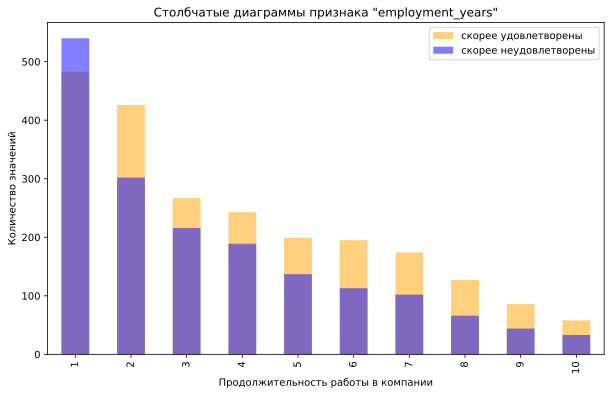

In [20]:
(df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['employment_years']
    .value_counts().plot.bar(color='orange', alpha=0.5, label='скорее удовлетворены'))
(df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['employment_years']
 .value_counts().plot.bar(color='blue', alpha=0.5, label='скорее неудовлетворены'))
plt.legend(loc='upper right')
plot_describe('Столбчатые диаграммы признака "employment_years"',
              'Продолжительность работы в компании', 'Количество значений')

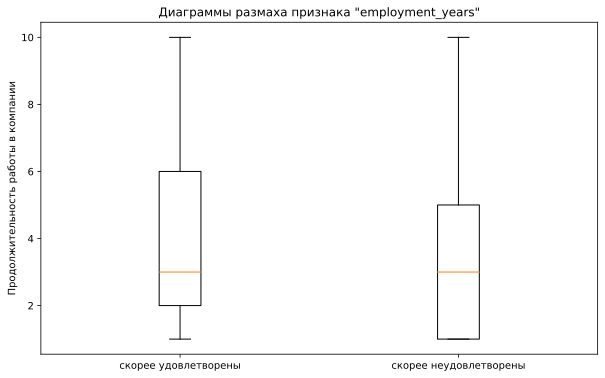

In [21]:
plt.boxplot([df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['employment_years'], 
            df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['employment_years']])
plt.xticks([1, 2], ['скорее удовлетворены', 'скорее неудовлетворены'])
plot_describe('Диаграммы размаха признака "employment_years"', '', 'Продолжительность работы в компании')

**Промежуточный вывод:**

Различия в двух выделенных группах не столь значительны, чтобы можно было строить первые предположения с высокой долей уверенности. Однако по распределению данного признака можно предположить, что люди, работающие в компании более продолжительное время — также проявляют к ней большую лояльность. 

#### Признак `supervisor_evaluation`

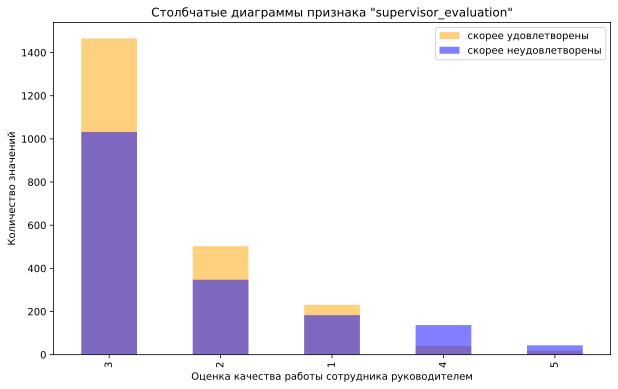

In [22]:
(df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['supervisor_evaluation']
    .value_counts(ascending=False).plot.bar(color='orange', alpha=0.5, label='скорее удовлетворены'))
(df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['supervisor_evaluation']
 .value_counts(ascending=False).plot.bar(color='blue', alpha=0.5, label='скорее неудовлетворены'))
plt.legend(loc='upper right')
plot_describe('Столбчатые диаграммы признака "supervisor_evaluation"',
              'Оценка качества работы сотрудника руководителем', 'Количество значений')

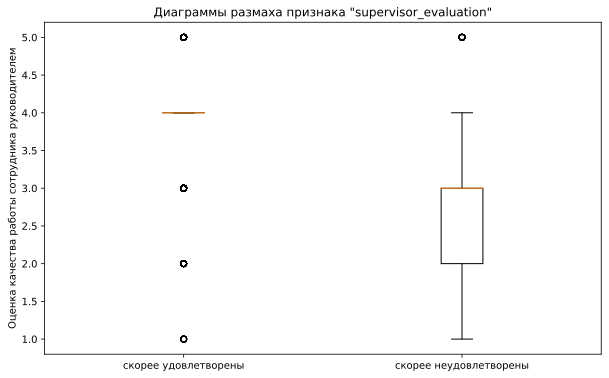

In [23]:
plt.boxplot([df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['supervisor_evaluation'], 
            df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['supervisor_evaluation']])
plt.xticks([1, 2], ['скорее удовлетворены', 'скорее неудовлетворены'])
plot_describe('Диаграммы размаха признака "supervisor_evaluation"', '',
              'Оценка качества работы сотрудника руководителем')

**Промежуточный вывод:**

Диаграммы размаха в данном случае получаются не очень информативными, но всё же показывают тенденцию к тому, что сотрудники, чья работа была оценена руководителем ниже, имеют большую склонность к неудовлетворённости работой в компании. 

#### Признак `salary`

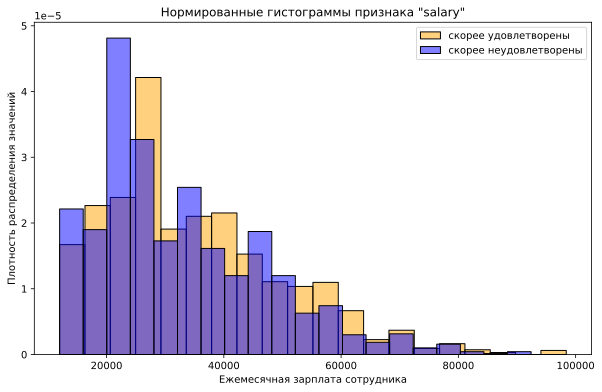

In [24]:
sb.histplot(df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['salary'],
        stat='density', bins=20, common_norm=False, alpha=0.5, color='orange', label='скорее удовлетворены')
sb.histplot(df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['salary'],
        stat='density', bins=20, common_norm=False, alpha=0.5, color='blue', label='скорее неудовлетворены')
plt.legend(loc='upper right')
plot_describe('Нормированные гистограммы признака "salary"',
              'Ежемесячная зарплата сотрудника', 'Плотность распределения значений')

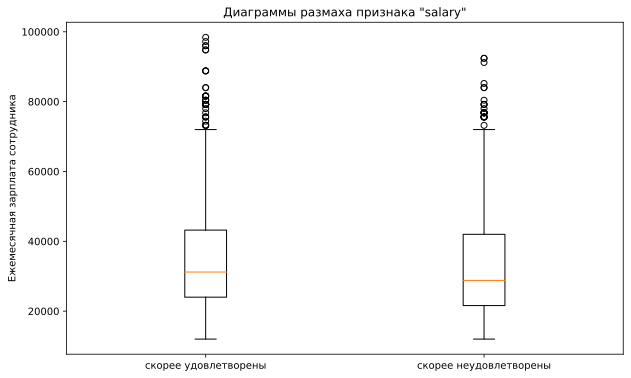

In [25]:
plt.boxplot([df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['salary'], 
            df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['salary']])
plt.xticks([1, 2], ['скорее удовлетворены', 'скорее неудовлетворены'])
plot_describe('Диаграммы размаха признака "salary"', '',
              'Ежемесячная зарплата сотрудника')

Заметны выбросы на диаграмме размаха. Определим их долю от общего числа строк в датасете:

In [26]:
print(f'Доля строк с выбросами: {round(len(df_train.query("salary > 70000")) / len(df_train) * 100, 1)}%')

Доля строк с выбросами: 2.1%


Изучим выбросы более детально:

In [27]:
display(df_train.loc[df_train['salary'] > 70000].head())
df_train.loc[df_train['salary'] > 70000]['level'].unique()

id        dept   level workload  employment_years last_year_promo  \
32   176144          hr  senior     high                 3              no   
45   538347  technology  senior     high                 3              no   
141  128304   marketing  senior     high                 7              no   
196  486576   marketing  senior     high                 9              no   
198  763200       sales  senior     high                 6             yes   

    last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
32                    no                      1   72000                   0.22  
45                    no                      1   84000                   0.21  
141                   no                      3   80400                   0.48  
196                   no                      4   76800                   0.66  
198                   no                      4   72000                   0.81

array(['senior'], dtype=object)

**Промежуточный вывод:**

В данных обнаружены малочисленные выбросы, однако аномальных значений среди них не наблюдается. Все сотрудники, чья зарплата выходит за границы "ящика с усами" имеют уровень "senior", так что более высокий доход для них более естественен. При этом хоть сколько-нибудь заметных различий между более и менее удовлетворёнными своей работой сотрудниками в рамках данного признака не наблюдается. 

#### Признак `job_satisfaction_rate`

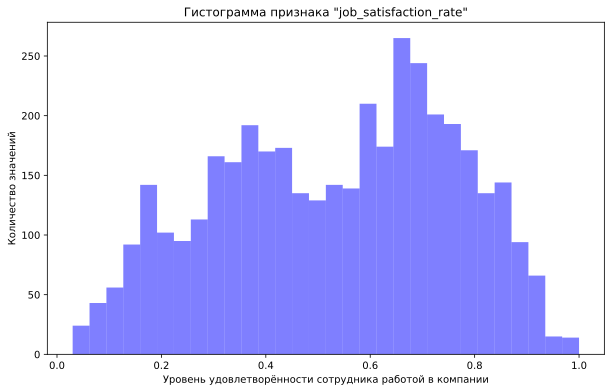

In [28]:
plt.hist(df_train['job_satisfaction_rate'], bins=30, color='blue', alpha=0.5)
plot_describe('Гистограмма признака "job_satisfaction_rate"',
              'Уровень удовлетворённости сотрудника работой в компании', 'Количество значений')

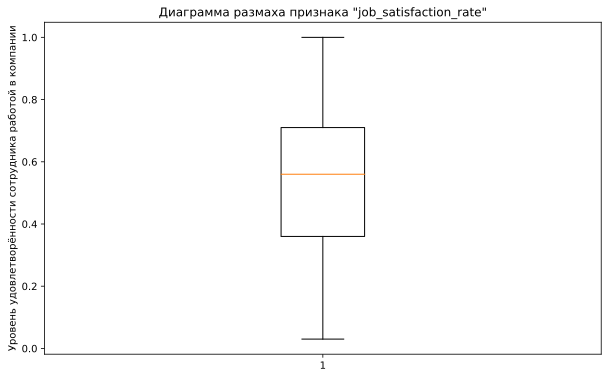

In [29]:
plt.boxplot(df_train['job_satisfaction_rate'])
plot_describe('Диаграмма размаха признака "job_satisfaction_rate"', '',
              'Уровень удовлетворённости сотрудника работой в компании')

**Промежуточный вывод:**

Выбросов в данных не обнаружено. Распределение напоминает бимодальное.

### Категориальные признаки

Для категориальных признаков целесообразнее построить круговую диаграмму, показывающую соотношение между различными категориями. 

#### Признак `dept`

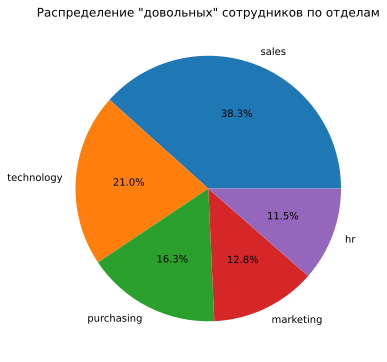

In [30]:
(df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['dept']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение "довольных" сотрудников по отделам')
plt.show()

**Промежуточный вывод:**

Заметных различий в уровне удовлетворённости у сотрудников различных отделов не наблюдается. Поэтому можно предположить, что в компании нет какого-то определённого "проблемного" отдела, в котором была бы значительная доля недовольных своей работой сотрудников. 

#### Признак `level`

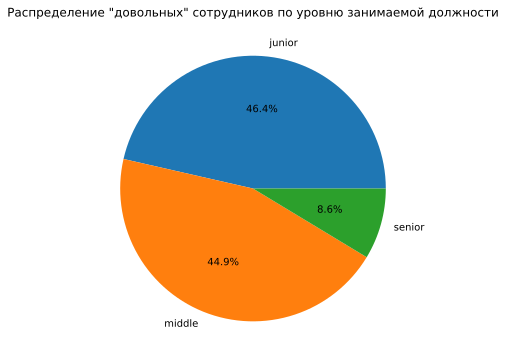

In [31]:
(df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['level']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение "довольных" сотрудников по уровню занимаемой должности')
plt.show()

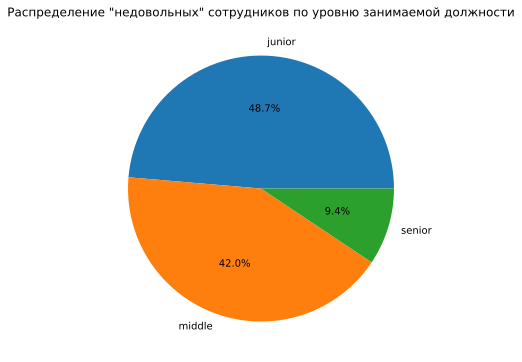

In [32]:
(df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['level']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение "недовольных" сотрудников по уровню занимаемой должности')
plt.show()

**Промежуточный вывод:**

Заметных различий в уровне удовлетворённости у сотрудников различных уровней не наблюдается. Поэтому можно предположить, что показатель удовлетворённости сотрудника работой в компании слабо зависит от уровня занимаемой им должности. 

#### Признак `workload`

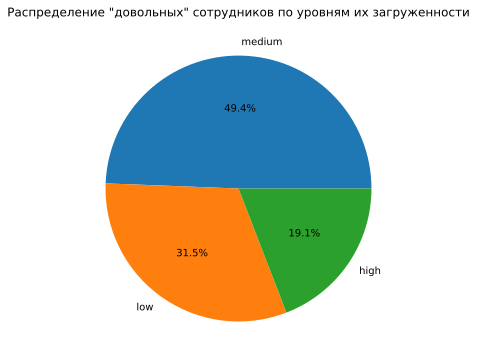

In [33]:
(df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['workload']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение "довольных" сотрудников по уровням их загруженности')
plt.show()

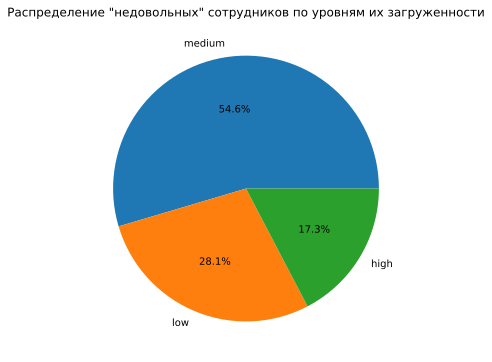

In [34]:
(df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['workload']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение "недовольных" сотрудников по уровням их загруженности')
plt.show()

**Промежуточный вывод:**

И вновь, каких-то заметных различий между сотрудниками с различной загруженностью не видно. Вероятно, уровень загруженности также не оказывает значительного влияния на удовлетворённость/неудовлетворённость сотрудников.

#### Признак `last_year_promo`

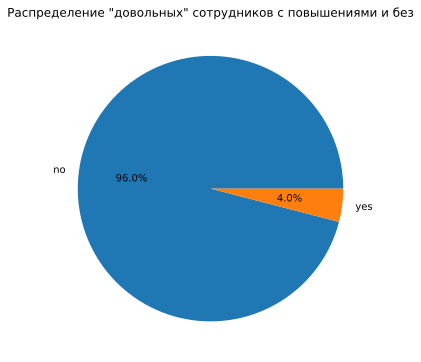

In [35]:
(df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['last_year_promo']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение "довольных" сотрудников c повышениями и без')
plt.show()

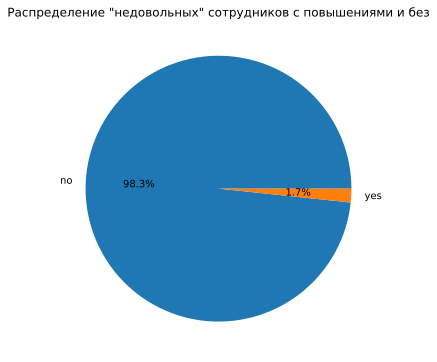

In [36]:
(df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['last_year_promo']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение "недовольных" сотрудников c повышениями и без')
plt.show()

**Промежуточный вывод:**

В рамках данного признака можно выдвинуть предположение о том, что сотрудники, получившие повышение в течение прошедшего года, скорее окажутся удовлетворены своей работой (что, в целом, довольно объяснимо).

#### Признак `last_year_violations`

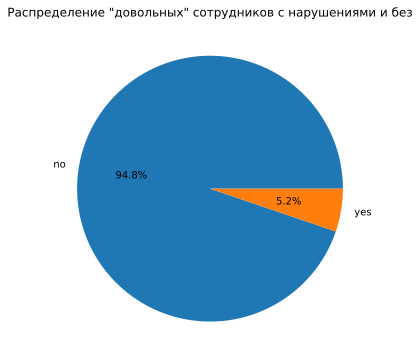

In [37]:
(df_train.loc[df_train['job_satisfaction_rate'] > 0.5]['last_year_violations']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение "довольных" сотрудников c нарушениями и без')
plt.show()

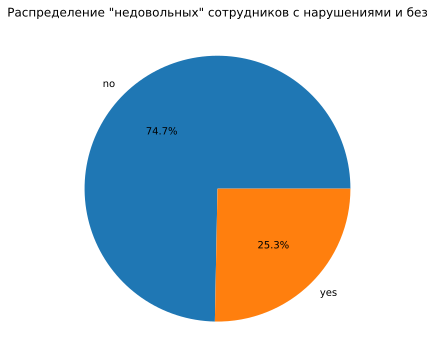

In [38]:
(df_train.loc[df_train['job_satisfaction_rate'] <= 0.5]['last_year_violations']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение "недовольных" сотрудников c нарушениями и без')
plt.show()

**Промежуточный вывод:**

В последнем из рассматриваемых признаков также есть определённая тенденция: сотрудники, нарушавшие трудовой договор в течение прошедшего года, скорее склонны к тому, чтобы быть недовольными своей работой компании. Можно только предполагать, в чём именно первопричина (неприятный разговор с начальством по поводу нарушения или сами причины, к нарушению подтолкнувшие), однако для нас важно на этом этапе отметить потенциально повышенную связь данного признака с целевым.  

### Корреляционный анализ тренировочной выборки

Найдём коэффициенты корреляции между всеми признаками в тренировочном датасете и отобразим их при помощи тепловой карты корреляций:

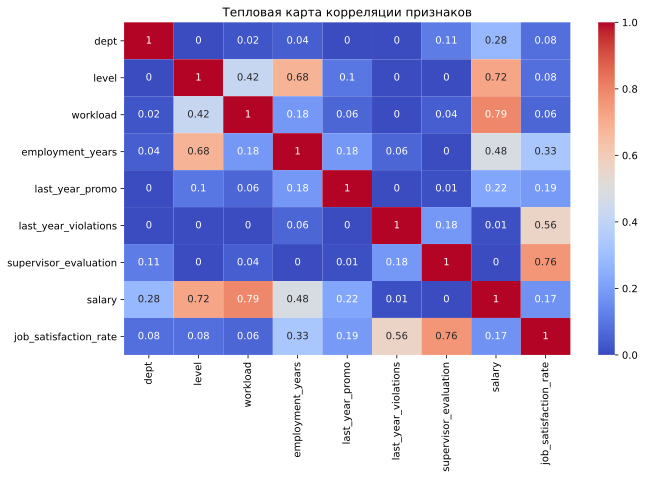

In [39]:
plt.figure(figsize=(10, 6))
sb.heatmap(df_train.drop('id', axis=1).phik_matrix(interval_cols=[
    'salary', 'job_satisfaction_rate'
]).round(2), annot=True, vmin=0, vmax=1, cmap='coolwarm')
plot_describe('Тепловая карта корреляции признаков', '', '')

**Промежуточный вывод:**

На основе матрицы корреляций можно судить о сильной корреляции между некоторыми входными признаками (например, между уровнями загруженности и зарплаты), однако явных признаков сильной мультиколлинеарности (0.9 и более) с целевым признаком мы не наблюдаем. 

### Анализ тестовых данных

Проведём аналогичный анализ для тестовой выборки. Сделать это необходимо ввиду того, что мы не сами занимались разделением данных на выборки, а, следовательно, надо убедиться в том, что в данных нет существенных различий в части распределений признаков, и что оценка модели, полученная на тестовой выборке, будет корректной.

### Количественные признаки

#### Признак `employment_years`

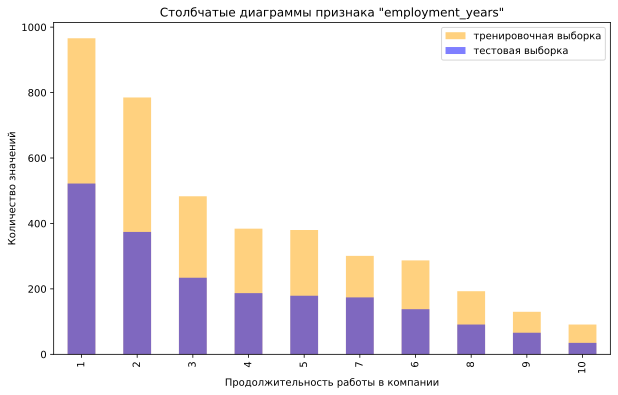

In [40]:
df_train['employment_years'].value_counts().plot.bar(color='orange', alpha=0.5, label='тренировочная выборка')
df_test['employment_years'].value_counts().plot.bar(color='blue', alpha=0.5, label='тестовая выборка')
plt.legend(loc='upper right')
plot_describe('Столбчатые диаграммы признака "employment_years"',
              'Продолжительность работы в компании', 'Количество значений')

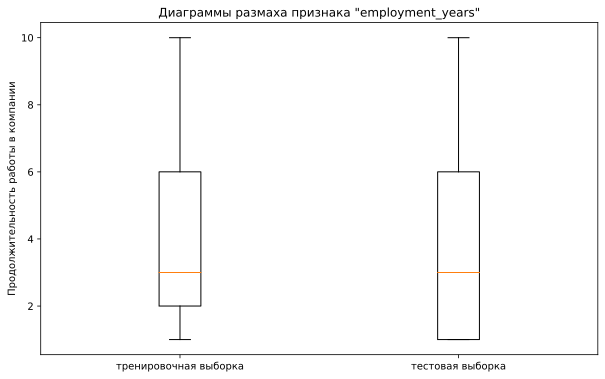

In [41]:
plt.boxplot([df_train['employment_years'], 
            df_test['employment_years']])
plt.xticks([1, 2], ['тренировочная выборка', 'тестовая выборка'])
plot_describe('Диаграммы размаха признака "employment_years"', '', 'Продолжительность работы в компании')

**Промежуточный вывод:**

Различия в тренировочной и тестовой выборках незначительны.

#### Признак `supervisor_evaluation`

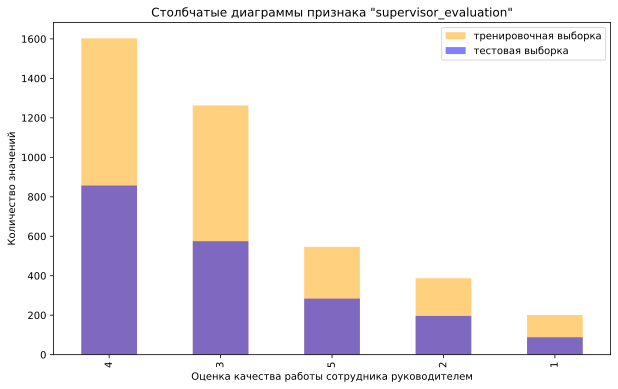

In [42]:
df_train['supervisor_evaluation'].value_counts().plot.bar(color='orange', alpha=0.5, label='тренировочная выборка')
df_test['supervisor_evaluation'].value_counts().plot.bar(color='blue', alpha=0.5, label='тестовая выборка')
plt.legend(loc='upper right')
plot_describe('Столбчатые диаграммы признака "supervisor_evaluation"',
              'Оценка качества работы сотрудника руководителем', 'Количество значений')

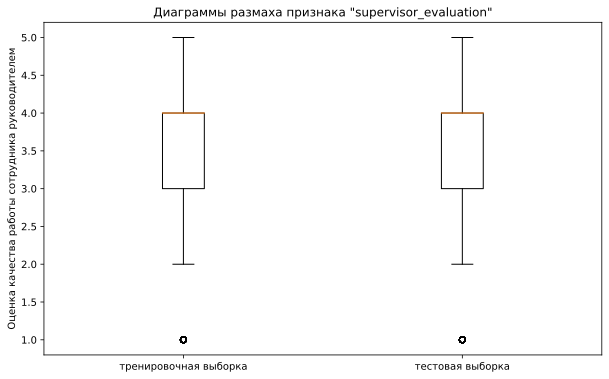

In [43]:
plt.boxplot([df_train['supervisor_evaluation'], 
            df_test['supervisor_evaluation']])
plt.xticks([1, 2], ['тренировочная выборка', 'тестовая выборка'])
plot_describe('Диаграммы размаха признака "supervisor_evaluation"', '',
              'Оценка качества работы сотрудника руководителем')

**Промежуточный вывод:**

Различия в тренировочной и тестовой выборках незначительны.

#### Признак `salary`

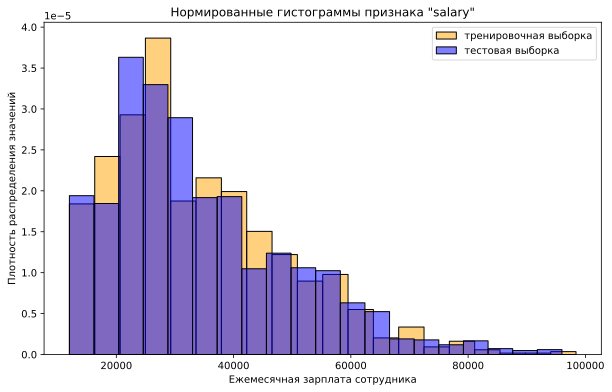

In [44]:
sb.histplot(df_train['salary'], stat='density', bins=20,
            common_norm=False, alpha=0.5, color='orange', label='тренировочная выборка')
sb.histplot(df_test['salary'], stat='density', bins=20, 
            common_norm=False, alpha=0.5, color='blue', label='тестовая выборка')
plt.legend(loc='upper right')
plot_describe('Нормированные гистограммы признака "salary"',
              'Ежемесячная зарплата сотрудника', 'Плотность распределения значений')

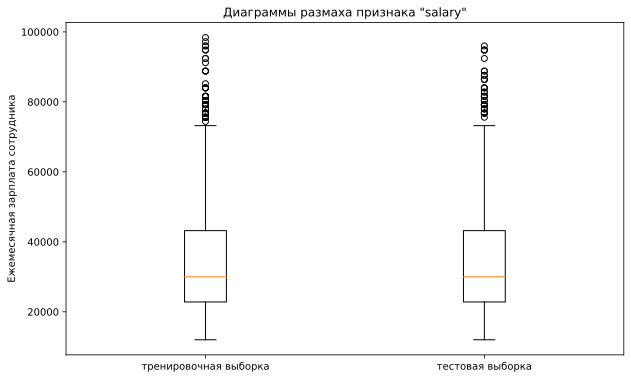

In [45]:
plt.boxplot([df_train['salary'], df_test['salary']])
plt.xticks([1, 2], ['тренировочная выборка', 'тестовая выборка'])
plot_describe('Диаграммы размаха признака "salary"', '',
              'Ежемесячная зарплата сотрудника')

**Промежуточный вывод:**

Различия в тренировочной и тестовой выборках незначительны.

### Категориальные признаки

#### Признак `dept`

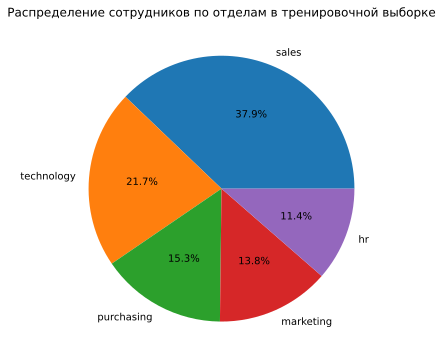

In [46]:
(df_train['dept'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников по отделам в тренировочной выборке')
plt.show()

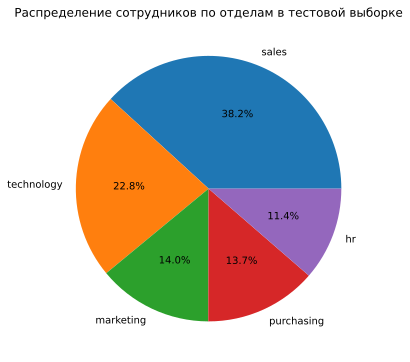

In [47]:
(df_test['dept'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников по отделам в тестовой выборке')
plt.show()

**Промежуточный вывод:**

Различия в тренировочной и тестовой выборках незначительны.

#### Признак `level`

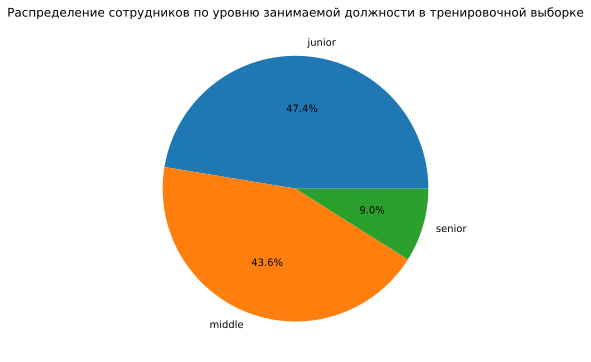

In [48]:
(df_train['level'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников по уровню занимаемой должности в тренировочной выборке')
plt.show()

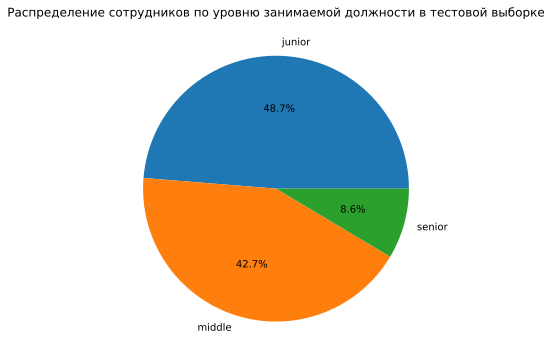

In [49]:
(df_test['level'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников по уровню занимаемой должности в тестовой выборке')
plt.show()

**Промежуточный вывод:**

Различия в тренировочной и тестовой выборках незначительны.

#### Признак `workload`

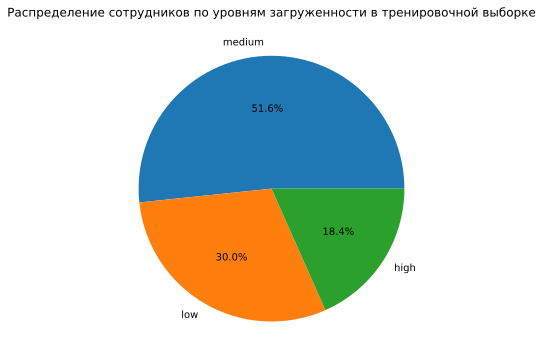

In [50]:
(df_train['workload'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников по уровням загруженности в тренировочной выборке')
plt.show()

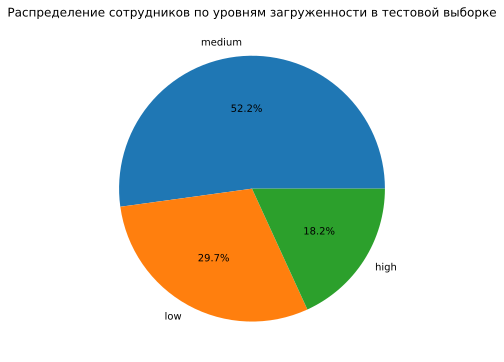

In [51]:
(df_test['workload'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников по уровням загруженности в тестовой выборке')
plt.show()

**Промежуточный вывод:**

Различия в тренировочной и тестовой выборках незначительны.

#### Признак `last_year_promo`

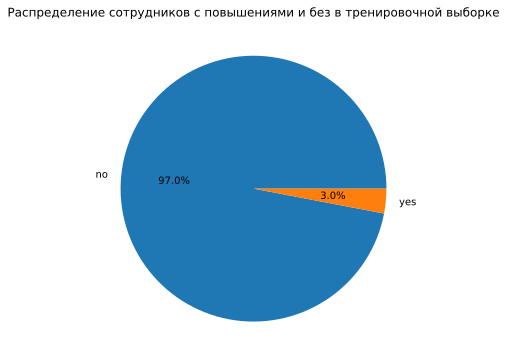

In [52]:
(df_train['last_year_promo'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников c повышениями и без в тренировочной выборке')
plt.show()

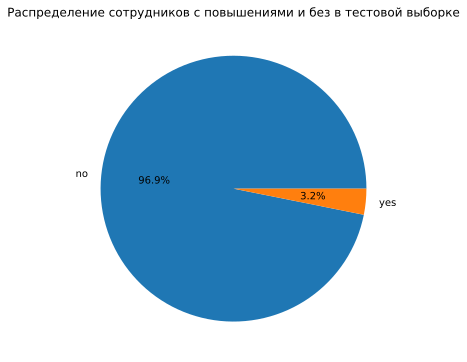

In [53]:
(df_test['last_year_promo'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников c повышениями и без в тестовой выборке')
plt.show()

**Промежуточный вывод:**

Различия в тренировочной и тестовой выборках незначительны.

#### Признак `last_year_violations`

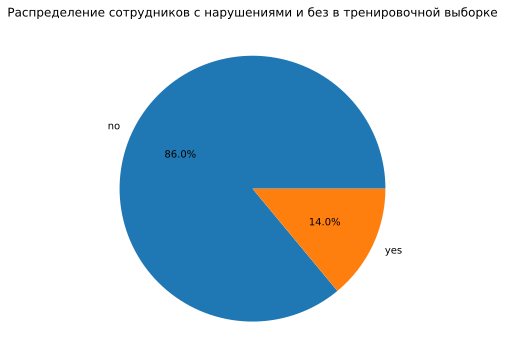

In [54]:
(df_train['last_year_violations'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников c нарушениями и без в тренировочной выборке')
plt.show()

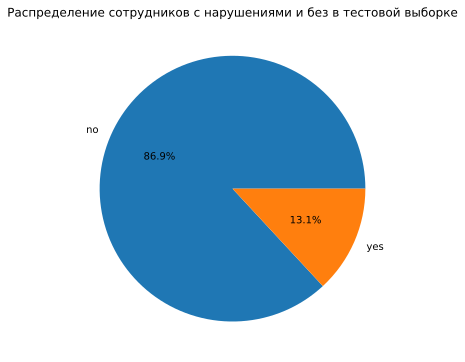

In [55]:
(df_test['last_year_violations'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение сотрудников c нарушениями и без в тестовой выборке')
plt.show()

**Промежуточный вывод:**

Различия в тренировочной и тестовой выборках незначительны.

### Корреляционный анализ тестовой выборки

Найдём коэффициенты корреляции между всеми признаками в тестовом датасете и отобразим их при помощи тепловой карты корреляций:

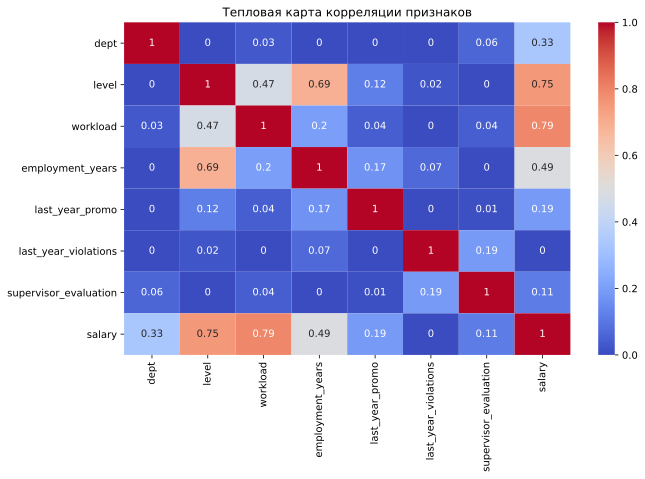

In [56]:
plt.figure(figsize=(10, 6))
sb.heatmap(df_test.drop('id', axis=1).phik_matrix(interval_cols=[
    'salary', 'job_satisfaction_rate'
]).round(2), annot=True, vmin=0, vmax=1, cmap='coolwarm')
plot_describe('Тепловая карта корреляции признаков', '', '')

**Промежуточный вывод:**

На основе матрицы корреляций можно судить о сильной корреляции между входными признаками (например, между уровнями загруженности и зарплаты). Значения корреляции практически не отличаются от аналогичных на тренировочной выборке.

### Выводы по исследовательскому анализу

1) В рамках исследовательского анализа были выделены две условные группы сотрудников: те, кто скорее удовлетворён своей работой в компании (`job_satisfaction_rate` > 0.5), и те, кто скорее неудовлетворён (`job_satisfaction_rate` <= 0.5). Для данных групп рассмотрены количественные и категориальные признаки. Для количественных признаков построены гистограммы/столбчатые диаграммы и диаграммы размаха, для категориальных — круговые диаграммы.

2) Аномальных значений обнаружено не было. Малочисленные выбросы было решено оставить ввиду объяснимости их природы

3) Различия в двух выделенных группах не столь значительны, чтобы делать на основании них однозначные выводы, однако можно выдвинуть ряд первых предположений:
- сотрудники, работающие в компании более продолжительное время — также проявляют к ней большую лояльность;
- сотрудники, чья работа была оценена руководителем ниже, имеют большую склонность к неудовлетворённости работой в компании;
- сотрудники, получившие повышение в течение прошедшего года, скорее окажутся удовлетворены своей работой;
- сотрудники, нарушавшие трудовой договор в течение прошедшего года, скорее склонны к тому, чтобы быть неудовлетворёнными своей работой компании;
- такие признаки как заработная плата, уровни занимаемой должности и загруженности, а также принадлежность к тому или иному отделу не выявили заметных различий между рассматриваемыми группами. 

4) На основе матрицы корреляций можно судить о сильной корреляции между некоторыми входными признаками, однако явных признаков сильной мультиколлинеарности (0.9 и более) с целевым признаком мы не наблюдаем. 

5) На основе полученных выводов можно сделать первые предложения по повышению уровня удовлетворённости сотрудников для руководства компании:
- Одним из ключевых аспектов является признание и оценка труда работников. Регулярная и конструктивная обратная связь от руководства позволит сотрудникам лучше понять, на каких аспектах своей работы им стоит сосредоточиться. Публичное признание достижений не только повысит моральный дух сотрудников, но и создаст культуру взаимоуважения и поддержки в команде. Также нужно предусмотреть механизмы для повышения квалификации и профессионального роста сотрудников, например, программы обучения и тренинги, которые помогут им развивать свои навыки и уверенность в себе.
- Важным фактором является и вопрос повышения. Как показывает анализ, сотрудники, получившие повышение, более удовлетворены своей работой. Поэтому компании следует мониторить возможности карьерного роста для своих сотрудников и создавать прозрачные пути для продвижения по службе. Это может быть реализовано через разработку программ развития карьеры, а также через ежеквартальные индивидуальные встречи, на которых будут обсуждаться цели и пути их достижения.
- Также стоит обратить внимание на трудовые договоры и соблюдение правил. Сотрудники, нарушавшие трудовой договор, как правило, менее удовлетворены своей работой. Важно прояснить требования и ожидания, а также создать систему поддержки, которая поможет работникам избежать недопонимания, которое может привести к нарушениям.
- Учитывая, что уровень зарплаты, должности и загруженности не оказывают заметного влияния на удовлетворённость, компании следует сфокусироваться на факторах, которые действительно влияют на атмосферу и моральный дух в команде. Например, внедрение программ по улучшению баланса между работой и личной жизнью, гибкие графики и дополнительные выходные могут значительно повысить общее восприятие работы.
- В заключение, для повышения уровня удовлетворённости сотрудников необходимо создать множество интерактивных и поддерживающих механизмов, которые бы способствовали росту, развитию и укреплению командного духа. Важно помнить, что лояльность сотрудников берётся не только из заработной платы или должности, но и из чувства ценности и уважения со стороны компании.

## Подготовка данных

Скорректируем тренировочную и тестовую выборки:

In [57]:
df_train_ml = df_train.set_index('id') # Индексируем выборки
df_test_ml = df_test.set_index('id')
df_test_target_ml = df_test_target.set_index('id')
display('Количество дубликатов df_train_ml после корректировки:', df_train_ml.duplicated().sum())

'Количество дубликатов df_train_ml после корректировки:'

245

Избавимся от дубликатов:

In [58]:
df_train_ml.drop_duplicates(inplace=True, ignore_index=False)
display('Количество дубликатов df_train_ml после удаления:', df_train_ml.duplicated().sum())

'Количество дубликатов df_train_ml после удаления:'

0

In [59]:
df_X_train_ml = df_train_ml.drop('job_satisfaction_rate', axis=1) # Выделяем целевой признак в тренировочной выборке
df_y_train_ml = df_train_ml['job_satisfaction_rate']

df_full_test = df_test_ml.merge(df_test_target_ml, right_index=True, left_index=True) 
df_X_test_ml = df_full_test.drop('job_satisfaction_rate', axis=1)
df_y_test_ml = df_full_test['job_satisfaction_rate']

df_y_train_ml = df_y_train_ml[df_y_train_ml.index.isin(df_X_train_ml.index)]

In [60]:
df_y_train_ml

id
155278    0.58
653870    0.76
184592    0.11
171431    0.37
693419    0.20
          ... 
424345    0.88
855240    0.27
533318    0.76
706868    0.48
338347    0.18
Name: job_satisfaction_rate, Length: 3755, dtype: float64

Для автоматизации машинного обучения (перебора вариантов масштабирования, выбора оптимальной модели и её гиперпараметров) в рамках данного анализа будем использовать пайплайны. Для кодирования категориальных признаков используем `OneHotEncoder` и `OrdinalEncoder`:

In [61]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations'] # Создаём списки с названиями признаков
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

ohe_pipe = Pipeline( # Cоздаём пайплайн для подготовки признаков из списка ohe_columns
   [   
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore')
        )
       
    ]
)   

ord_pipe = Pipeline( # Cоздаём пайплайн для подготовки признаков из списка ord_columns
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

data_preprocessor = ColumnTransformer( # Cоздаём общий пайплайн для подготовки данных
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

pipe_final = Pipeline([ # Создаём итоговый пайплайн
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

## Обучение моделей

In [62]:
def smape(y_true, y_pred): # Создадим новую метрику
    return 100/len(y_true) * np.sum(np.abs(y_true - y_pred)/((np.abs(y_true) + np.abs(y_pred))/2))

smape_score = make_scorer(smape, greater_is_better=False)

In [63]:
param_grid = [[ # Создаём сетку гиперпараметров для перебора моделей
    { # Словарь для модели DecisionTreeRegressor()
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__min_samples_split': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }],

    [{ # Словарь для модели KNeighborsRegressor() 
        'models': [KNeighborsRegressor(n_jobs=-1, weights='distance')],
        'models__n_neighbors': range(4, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }],
    
        
    [{ # Словарь для модели LinearRegression()
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    }],

    [{ # Словарь для модели SVR() 
        'models': [SVR()],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }]
]

Наконец, произведём перебор гиперпараметров для каждой модели и выведем результаты в виде таблицы:

In [64]:
models = [] # Создаём пустые списки для таблицы результатов 
train_score = []

score_table = { # Создаём шаблон таблицы результатов
    'model': models,
    'cv_smape': train_score,
}
 
for grid in param_grid: # Создаём цикл для перебора гиперпараметров
    search = RandomizedSearchCV(
        pipe_final,
        grid,
        n_jobs=-1,
        cv=5,
        n_iter=10,
        scoring=smape_score,
        random_state=RANDOM_STATE
    )
    
    search.fit(df_X_train_ml, df_y_train_ml) # Обучаем модель
    current_best_model = search.best_estimator_['models']
    current_train_score = (-1) * search.best_score_
    
    models.append(current_best_model) # Сохраняем результат итерации
    train_score.append(current_train_score)

scoring_table = pd.DataFrame(score_table) # Выводим таблицу с результатами
scoring_table.sort_values(by='cv_smape')

C:\Anaconda\envs\practicum\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


model   cv_smape
3                                           SVR(C=4)  14.994133
1  KNeighborsRegressor(n_jobs=-1, n_neighbors=8, ...  16.403242
0  DecisionTreeRegressor(max_depth=13, max_featur...  16.805189
2                                 LinearRegression()  25.005621

In [65]:
predictions_test = search.best_estimator_.predict(df_X_test_ml)
test_score = smape(df_y_test_ml, predictions_test)

print(f'Метрика SMAPE лучшей модели на тестовой выборке: {test_score}')

Метрика SMAPE лучшей модели на тестовой выборке: 13.611135416686862


**Промежуточный вывод:**

По итогу перебора моделей и их гиперпараметров лучшей моделью оказалась SVR с параметром C=4. Метрика SMAPE на тестовой выборке составила 13.6, что соответствует заявленному критерию успешности (SMAPE < 15).

## Анализ важности признаков

Лучшей моделью оказалась SVR, однако она сложна в интерпретации. Поэтому на данном этапе мы рассмотрим степень влияния различных признаков на итоговое предсказание, и найдём те из них, которые вносят наибольший и наименьший вклад:

In [66]:
model = search.best_estimator_['models']
preprocessor_pipe = search.best_estimator_.named_steps['preprocessor']
X_train_scalled = preprocessor_pipe.fit_transform(df_X_train_ml)
X_test_scalled = preprocessor_pipe.transform(df_X_test_ml)
feature_names = search.best_estimator_[:-1].get_feature_names_out()
X_df = pd.DataFrame(X_test_scalled, columns=feature_names)

explainer = shap.KernelExplainer(model.predict, X_df[:10])
shap_values = explainer(X_test_scalled[:100])

  0%|          | 0/100 [00:00<?, ?it/s]

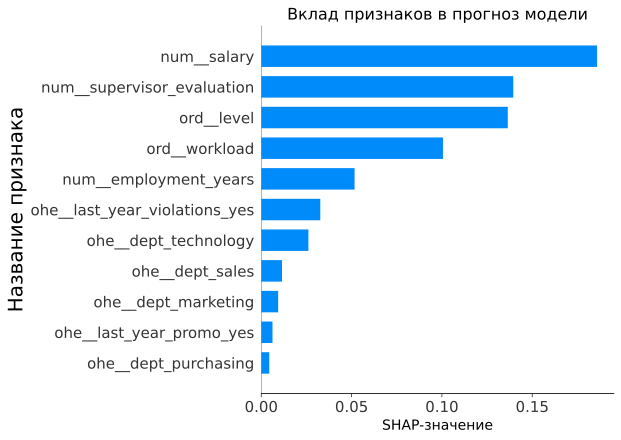

In [67]:
shap.summary_plot(shap_values, X_test_scalled, feature_names=feature_names, plot_type="bar", show=False)

fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=14)
ax.set_title('Вклад признаков в прогноз модели', fontsize=16)
ax.set_xlabel('SHAP-значение', fontsize=14)

cb_ax = fig.axes[0] 
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel('Название признака', fontsize=20)

plt.show()

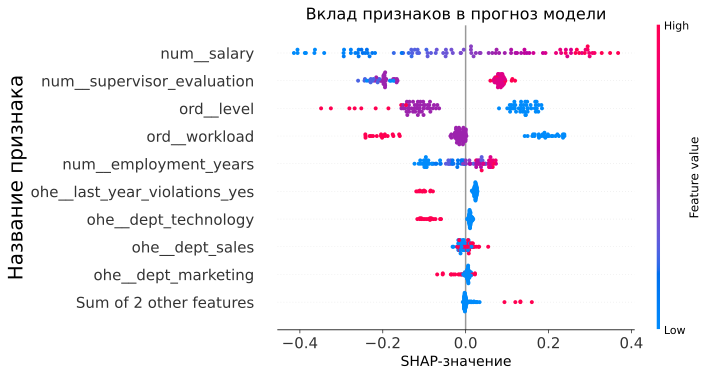

In [68]:
shap.plots.beeswarm(shap_values, show=False)

fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=14)
ax.set_title('Вклад признаков в прогноз модели', fontsize=16)
ax.set_xlabel('SHAP-значение', fontsize=14)

cb_ax = fig.axes[0]
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel('Название признака', fontsize=20)

plt.show()

In [69]:
features = pd.DataFrame(feature_names)
features

0
0             ohe__dept_marketing
1            ohe__dept_purchasing
2                 ohe__dept_sales
3            ohe__dept_technology
4        ohe__last_year_promo_yes
5   ohe__last_year_violations_yes
6                      ord__level
7                   ord__workload
8           num__employment_years
9      num__supervisor_evaluation
10                    num__salary

Наибольший вклад в прогнозирование вносят признаки:
- размер заработной платы;
- уровень занимаемой должности;
- оценка работы сотрудника руководителем.

Наименьший вклад в прогнозирование вносят признаки:
- принадлежность к тому или иному отделу;
- повышение в текущем году;
- наличие нарушений за последний год.

**Промежуточный вывод:**

Согласно результатам моделирования на уровень удовлетворённости сотрудников наиболее сильно влияют такие признаки как уровень зарплаты и занимаемой должности, а также оценка работы сотрудника руководителем. Соответственно, для повышения удовлетворённости сотрудников необходимо повысить и значимость этих факторов в их глазах. Для этого можно:
1. Улучшить политику оплаты труда — пересмотреть систему заработных плат и провести анализ рынка, чтобы зарплаты соответствовали конкурентному уровню, а также ввести систему прозрачных бонусов и премий, связанных с результатами работы.
2. Разработать стратегию развития карьерных возможностей. Иными словами — создать понятную карьерную лестницу, чтобы сотрудники видели перспективы роста; чётко обозначить условия продвижения по службе, чтобы сотрудники понимали, какие результаты от них ожидаются, а повышения были предсказуемыми и зависящими от объективных показателей.
3. Улучшить обратную связь от руководства. Например, ввести регулярные встречи сотрудников с руководителями для обсуждения успехов и перспектив.
4. Усилить нематериальную мотивацию — разработать программы поощрения лучших сотрудников не только деньгами, но и другими методами (гибкий график, удалённая работа, дополнительные выходные, подарки и т.д.).

# Задача 2

## Загрузка данных

Считаем csv-файлы:

In [70]:
pth7 = 'C:/pr/sat/train_quit.csv'
pth8 = 'C:/pr/sat/test_target_quit.csv'
pth9 = '/datasets/train_quit.csv'
pth10 = '/datasets/test_target_quit.csv'

if os.path.exists(pth7):
    df_train_2 = pd.read_csv(pth7)
elif os.path.exists(pth9):
    df_train_2 = pd.read_csv(pth9)
else:
    print('Something is wrong')

if os.path.exists(pth8):
    df_test_target_2 = pd.read_csv(pth8)
elif os.path.exists(pth10):
    df_test_target_2 = pd.read_csv(pth10)
else:
    print('Something is wrong')

df_test_2 = df_test # Это один и тот же датасет в рамках обеих задач, поэтому нет смысла повторно его обрабатывать

Изучим общую информацию о датасетах:

In [71]:
describe_data(df_train_2) # Изучаем данные о тренировочной выборке

Первые пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
3                  yes                      3   24000  yes  
4                   no                      5   25200   no


 Последние пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
3995  588809       sales  junior   medium                 4              no   
3996  672059       sales  middle     high                 9              no   
3997  536432  purchasing  junior      low                 2              no   
3998  692133  purchasing  middle   medium                 2              no   
3999  853842       sales  junior   medium                 2              no   

     last_year_violations  supervisor_evaluation  salary quit  
3995                   no                      3   26400   no  
3996                   no                      4   52800   no  
3997                  yes                      4   12000  yes  
3998                   no                      4   33600   no  
3999                   no                      3   27600  yes


 Общая информация о датасете: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None


 Описательные статистики датасета:


id  employment_years  supervisor_evaluation    salary
count    4000.00           4000.00                4000.00   4000.00
mean   552099.28              3.70                   3.47  33805.80
std    260158.03              2.54                   1.00  15152.42
min    100222.00              1.00                   1.00  12000.00
25%    327785.75              2.00                   3.00  22800.00
50%    546673.00              3.00                   4.00  30000.00
75%    781497.75              6.00                   4.00  43200.00
max    999915.00             10.00                   5.00  96000.00


 Количество дубликатов в данных:


0

In [72]:
describe_data(df_test_2) # Изучаем данные о тестовой выборке

Первые пять строк таблицы:


id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  
0                   no                      5   28800  
1                   no                      4   30000  
2                   no                      4   19200  
3                   no                      4   19200  
4                   no                      5   40800


 Последние пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
1995  393147   marketing  junior      low                 3              no   
1996  109582  technology  middle      low                 3              no   
1997  305653  technology  junior      low                 1              no   
1998  160233  technology  middle      low                 8              no   
1999  771859  purchasing  middle   medium                 1              no   

     last_year_violations  supervisor_evaluation  salary  
1995                   no                      3   20400  
1996                   no                      2   21600  
1997                   no                      3   14400  
1998                   no                      1   32400  
1999                   no                      4   38400


 Общая информация о датасете: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1997 non-null   object
 2   level                  1999 non-null   object
 3   workload               1999 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None


 Описательные статистики датасета:


id  employment_years  supervisor_evaluation    salary
count    2000.00           2000.00                2000.00   2000.00
mean   552765.21              3.67                   3.53  34066.80
std    253851.33              2.54                   1.00  15398.44
min    100298.00              1.00                   1.00  12000.00
25%    339052.00              1.00                   3.00  22800.00
50%    550793.00              3.00                   4.00  30000.00
75%    765763.75              6.00                   4.00  43200.00
max    999029.00             10.00                   5.00  96000.00


 Количество дубликатов в данных:


0

In [73]:
describe_data(df_test_target_2) # Изучаем данные о целевом признаке

Первые пять строк таблицы:


id quit
0  999029  yes
1  372846   no
2  726767   no
3  490105   no
4  416898  yes


 Последние пять строк таблицы:


id quit
1995  836109  yes
1996  180999  yes
1997  746018   no
1998  247658   no
1999  460332  yes


 Общая информация о датасете: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None


 Описательные статистики датасета:


id
count    2000.00
mean   552765.21
std    253851.33
min    100298.00
25%    339052.00
50%    550793.00
75%    765763.75
max    999029.00


 Количество дубликатов в данных:


0

**Промежуточный вывод:**

Проблем при выгрузке данных не возникло, очевидных дубликатов и пропусков нет. На следующем этапе попробуем обнаружить неявные дубликаты.

##  Предобработка данных

Попробуем обнаружить неявные дубликаты. Для этого проверим сперва тренировочный датасет. Данные выведем в словарь, в котором ключ будет представлять собой название столбца, а значение — список его уникальных значений:

In [74]:
[{i: df_train_2[i].unique()} for i in df_train_2.columns if df_train_2[i].dtype == 'object']

[{'dept': array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
        dtype=object)},
 {'level': array(['middle', 'junior', 'sinior'], dtype=object)},
 {'workload': array(['high', 'medium', 'low'], dtype=object)},
 {'last_year_promo': array(['no', 'yes'], dtype=object)},
 {'last_year_violations': array(['no', 'yes'], dtype=object)},
 {'quit': array(['no', 'yes'], dtype=object)}]

Неявных дубликатов нет, однако смущает опечатка в слове "senior". Исправим её:

In [75]:
df_train_2['level'].replace({'sinior': 'senior'}, inplace=True)

C:\Users\Николай\AppData\Local\Temp\ipykernel_1492\2106346494.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train_2['level'].replace({'sinior': 'senior'}, inplace=True)


Также проверим, не появилось ли новых дубликатов в данных ввиду замены значений:

In [76]:
df_train_2.duplicated().sum() # Не появилось

0

Аналогично для датасета с целевым признаком:

In [77]:
df_test_target_2['quit'].unique() # Неявных дубликатов также нет 

array(['yes', 'no'], dtype=object)

**Промежуточный вывод:**

Неявных дубликатов в данных также не оказалось, однако была опечатка в слове "senior" (опечатку исправили).

## Исследовательский анализ данных

На данном этапе мы детальнее изучим параметры на предмет возникновения аномалий и выбросов в данных. Для этого рассмотрим количественные и категориальные признаки по отдельности. Но для этого сперва отсортируем их в два отдельных списка:

In [78]:
num_cols = [] 
cat_cols = []
for i in df_train_2.columns:
    if df_train_2[i].dtype == 'object':
        cat_cols.append(i)
    else:
        if (i != 'id'):
            num_cols.append(i)
print('Количественные признаки:', num_cols, '\n')
print('Категориальные признаки:', cat_cols, '\n')

Количественные признаки: ['employment_years', 'supervisor_evaluation', 'salary'] 

Категориальные признаки: ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit'] 



### Количественные признаки

Начнём изучение количественных признаков в том же порядке, в котором они идут в тренировочном датасете. Продолжим признаками из остальных датасетов. Для каждого из признаков построим гистограмму (либо же столбчатую диаграмму для дискретных признаков) и диаграмму размаха, а также изучим влияние данного признака на целевой.

#### Признак `employment_years`

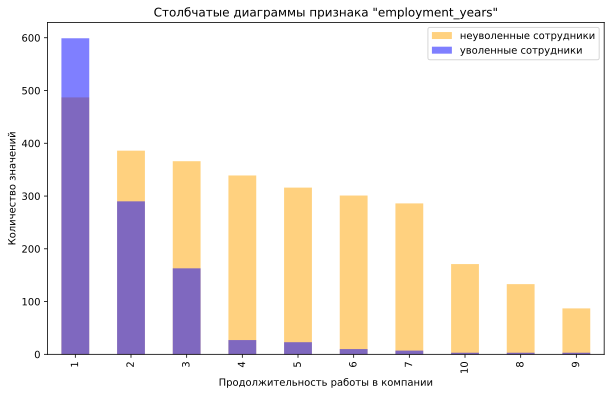

In [79]:
(df_train_2.loc[df_train_2['quit'] == 'no']['employment_years']
    .value_counts().plot.bar(color='orange', alpha=0.5, label='неуволенные сотрудники'))
(df_train_2.loc[df_train_2['quit'] == 'yes']['employment_years']
 .value_counts().plot.bar(color='blue', alpha=0.5, label='уволенные сотрудники'))
plt.legend(loc='upper right')
plot_describe('Столбчатые диаграммы признака "employment_years"',
              'Продолжительность работы в компании', 'Количество значений')

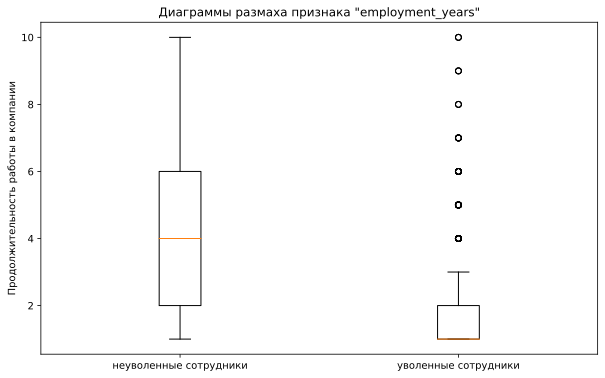

In [80]:
plt.boxplot([df_train_2.loc[df_train_2['quit'] == 'no']['employment_years'], 
            df_train_2.loc[df_train_2['quit'] == 'yes']['employment_years']])
plt.xticks([1, 2], ['неуволенные сотрудники', 'уволенные сотрудники'])
plot_describe('Диаграммы размаха признака "employment_years"', '', 'Продолжительность работы в компании')

**Промежуточный вывод:**

Для уволенных сотрудников характерна меньшая продолжительность работы в компании (мало кто из них задерживается более трёх лет). Это косвенно подтвреждает выдвинутое в рамках первой задачи предположение о том, что люди, работающие в компании более продолжительное время — также проявляют к ней большую лояльность и, как следствие, реже увольняются. 

#### Признак `supervisor_evaluation`

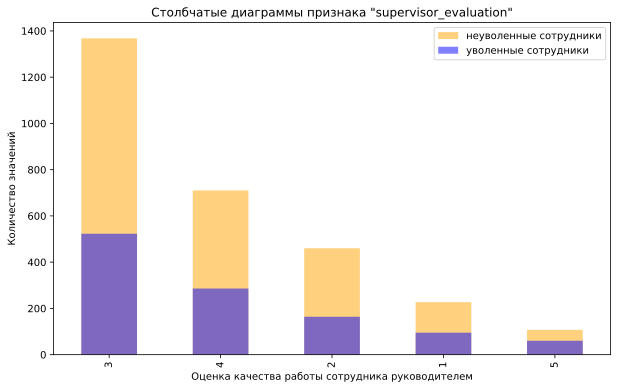

In [81]:
(df_train_2.loc[df_train_2['quit'] == 'no']['supervisor_evaluation']
    .value_counts().plot.bar(color='orange', alpha=0.5, label='неуволенные сотрудники'))
(df_train_2.loc[df_train_2['quit'] == 'yes']['supervisor_evaluation']
 .value_counts().plot.bar(color='blue', alpha=0.5, label='уволенные сотрудники'))
plt.legend(loc='upper right')
plot_describe('Столбчатые диаграммы признака "supervisor_evaluation"',
              'Оценка качества работы сотрудника руководителем', 'Количество значений')

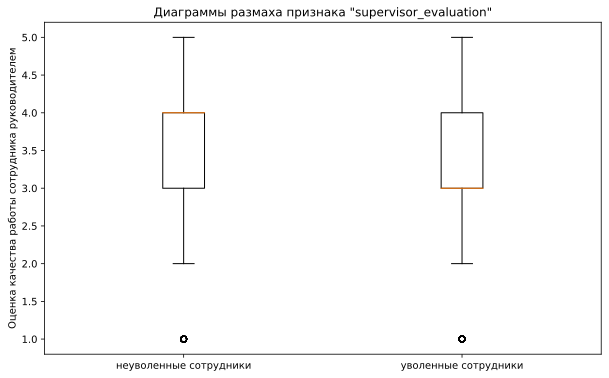

In [82]:
plt.boxplot([df_train_2.loc[df_train_2['quit'] == 'no']['supervisor_evaluation'], 
            df_train_2.loc[df_train_2['quit'] == 'yes']['supervisor_evaluation']])
plt.xticks([1, 2], ['неуволенные сотрудники', 'уволенные сотрудники'])
plot_describe('Диаграммы размаха признака "supervisor_evaluation"', '',
              'Оценка качества работы сотрудника руководителем')

**Промежуточный вывод:**

Судя по диаграммам, различий в оценке руководителем уволенных и неуволенных сотрудников практически нет.

#### Признак `salary`

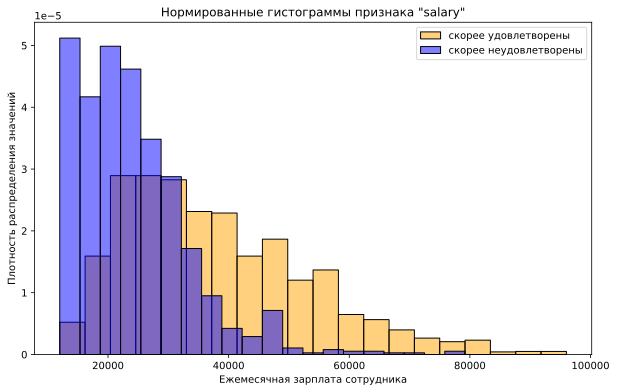

In [83]:
sb.histplot(df_train_2.loc[df_train_2['quit'] == 'no']['salary'],
        stat='density', bins=20, common_norm=False, alpha=0.5, color='orange', label='скорее удовлетворены')
sb.histplot(df_train_2.loc[df_train_2['quit'] == 'yes']['salary'],
        stat='density', bins=20, common_norm=False, alpha=0.5, color='blue', label='скорее неудовлетворены')
plt.legend(loc='upper right')
plot_describe('Нормированные гистограммы признака "salary"',
              'Ежемесячная зарплата сотрудника', 'Плотность распределения значений')

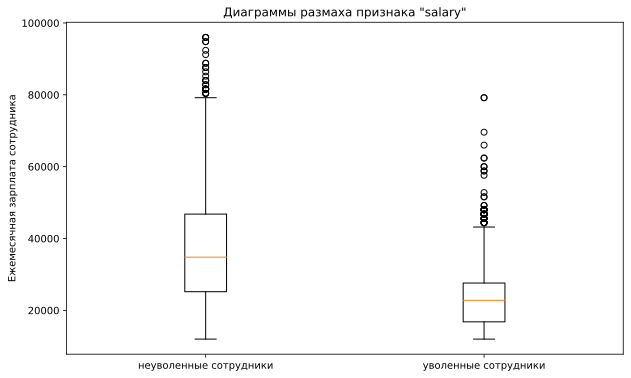

In [84]:
plt.boxplot([df_train_2.loc[df_train_2['quit'] == 'no']['salary'], 
            df_train_2.loc[df_train_2['quit'] == 'yes']['salary']])
plt.xticks([1, 2], ['неуволенные сотрудники', 'уволенные сотрудники'])
plot_describe('Диаграммы размаха признака "salary"', '',
              'Ежемесячная зарплата сотрудника')

**Промежуточный вывод:**

В данных обнаружены выбросы, однако аномальных значений среди них не наблюдается. Для уволенных сотрудников характерен меньший размер заработной платы, но это вполне объяснимо тем, что и срок работы в компании у таких сотрудников, как правило, меньше. А значит, многие из них попросту не успевают "вырасти" до более значимых уровней занимаемой должности и соответствующей ей зарплаты.

### Категориальные признаки

Для категориальных признаков целесообразнее построить круговую диаграмму, показывающую соотношение между различными категориями. 

#### Признак `dept`

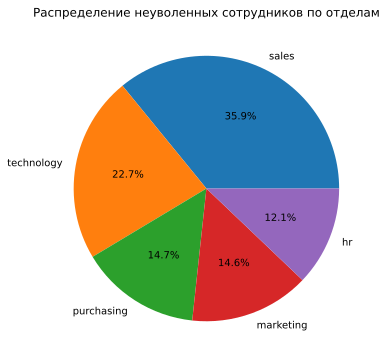

In [85]:
(df_train_2.loc[df_train_2['quit'] == 'no']['dept']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение неуволенных сотрудников по отделам')
plt.show()

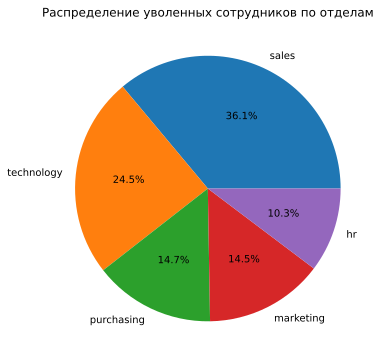

In [86]:
(df_train_2.loc[df_train_2['quit'] == 'yes']['dept']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение уволенных сотрудников по отделам')
plt.show()

**Промежуточный вывод:**

Заметных различий в количестве увольнений у сотрудников различных отделов не наблюдается. Поэтому можно предположить, что в компании нет какого-то определённого "проблемного" отдела, в котором была бы значительная доля уволенных сотрудников. 

#### Признак `level`

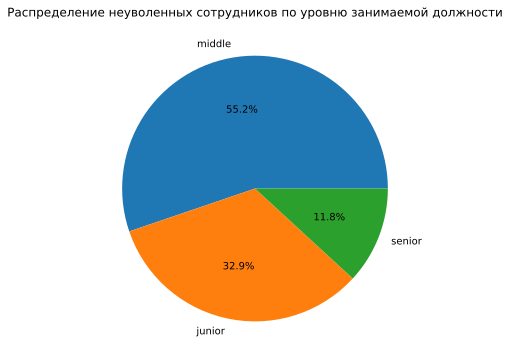

In [87]:
(df_train_2.loc[df_train_2['quit'] == 'no']['level']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение неуволенных сотрудников по уровню занимаемой должности')
plt.show()

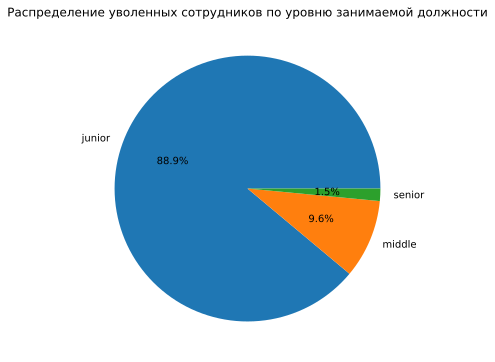

In [88]:
(df_train_2.loc[df_train_2['quit'] == 'yes']['level']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение уволенных сотрудников по уровню занимаемой должности')
plt.show()

**Промежуточный вывод:**

Подавляющее большинство уволенных сотрудников занимают должности уровня junior. И это вполне объяснимо ввиду того, что большинство уволенных не успевают проработать в компании более трёх лет, а, следовательно, не успевают получить повышения.

#### Признак `workload`

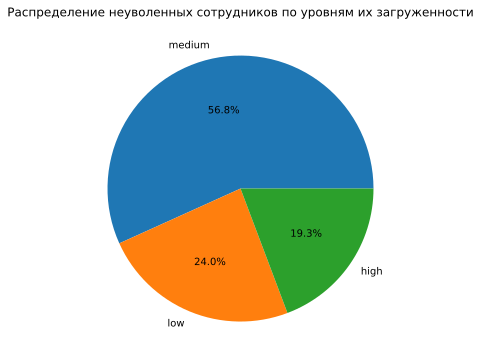

In [89]:
(df_train_2.loc[df_train_2['quit'] == 'no']['workload']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение неуволенных сотрудников по уровням их загруженности')
plt.show()

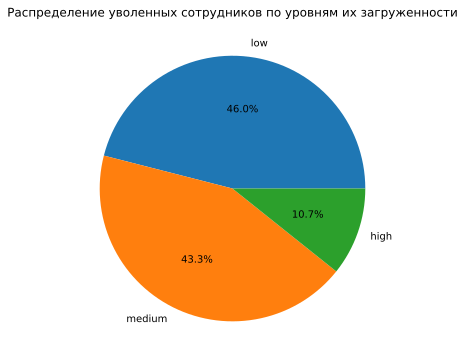

In [90]:
(df_train_2.loc[df_train_2['quit'] == 'yes']['workload']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение уволенных сотрудников по уровням их загруженности')
plt.show()

**Промежуточный вывод:**

Загруженность уволенных сотрудников в целом меньше, чем у неуволенных, однако это легко объяснить тем, что большинство из уволенных занимают менее значимые должности и, как следствие, выполняют менее сложные задачи. 

#### Признак `last_year_promo`

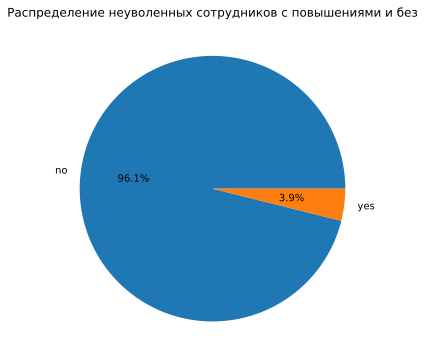

In [91]:
(df_train_2.loc[df_train_2['quit'] == 'no']['last_year_promo']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение неуволенных сотрудников c повышениями и без')
plt.show()

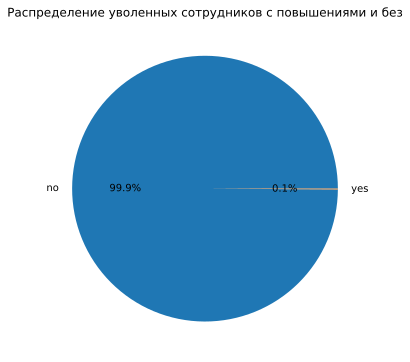

In [92]:
(df_train_2.loc[df_train_2['quit'] == 'yes']['last_year_promo']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение уволенных сотрудников c повышениями и без')
plt.show()

Найдём сотрудников, получивших повышение в течение последнего года, но всё равно уволенных:

In [93]:
df_train_2.loc[(df_train_2['quit'] == 'yes') & (df_train_2['last_year_promo'] == 'yes')] # Такой сотрудник всего один

id   dept   level workload  employment_years last_year_promo  \
3531  791500  sales  middle      low                 6             yes   

     last_year_violations  supervisor_evaluation  salary quit  
3531                   no                      3   27600  yes

**Промежуточный вывод:**

Среди уволенных сотрудников лишь один получил повышение в течение последнего года. И это вновь легко объяснить тем, что большинство из уволенных занимали должности уровня junior и проработали в компании не более трёх лет. Однако, такие показатели могут служить сигналом к тому, что компании было бы неплохо пересмотреть критерии, по которым производится повышение сотрудников, так как в условиях современного рынка труда отсутствие роста в должности за 3 года действительно может демотивировать большинство работников на дальнейшее сотрудничество с компанией. 

#### Признак `last_year_violations`

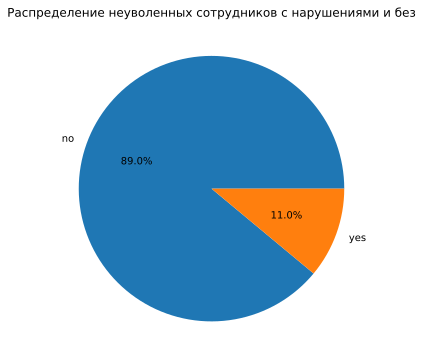

In [94]:
(df_train_2.loc[df_train_2['quit'] == 'no']['last_year_violations']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение неуволенных сотрудников c нарушениями и без')
plt.show()

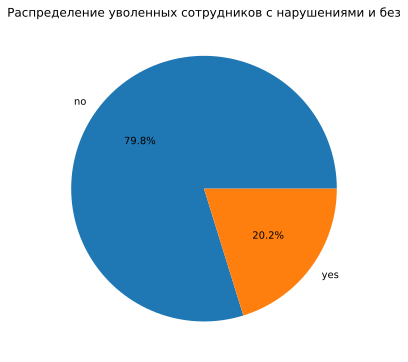

In [95]:
(df_train_2.loc[df_train_2['quit'] == 'yes']['last_year_violations']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение уволенных сотрудников c нарушениями и без')
plt.show()

**Промежуточный вывод:**

Среди уволенных сотрудников значительно больший процент совершавших нарушения трудового договора. Возможно, эти нарушения могли в том числе стать причиной увольнения.

#### Признак `quit`

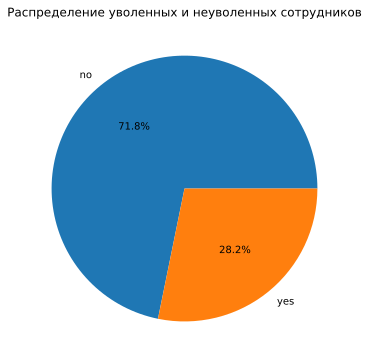

In [96]:
(df_train_2['quit'].value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Распределение уволенных и неуволенных сотрудников')
plt.show()

**Промежуточный вывод:**

Количество уволенных сотрудников составляет почти четверть от общего представленного в датасете числа. Сложно судить о том, много это или мало ввиду того, что непонятно, какой период охватывает данный признак. Для нас здесь важно отметить только дисбаланс между "подгруппами" — неуволенных сотрудников почти втрое больше, чем уволенных. Это может оказаться полезным для дальнейшего анализа.

### Портрет уволившегося сотрудника

Бóльшая часть необходимых нам данных уже получена на этапе рассмотрения количественных и категориальных признаков. На данном этапе получим более точные значения рассматриваемых признаков:

In [97]:
df_dismissed = df_train_2.loc[df_train_2['quit'] == 'yes']
df_not_dismissed = df_train_2.loc[df_train_2['quit'] == 'no']
describe_data(df_dismissed) # Изучаем данные об уволенных сотрудниках

Первые пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
3   257132       sales  junior   medium                 2              no   
5   699916       sales  junior      low                 1              no   
9   613206  technology  middle   medium                 2              no   
24  468145  technology  junior   medium                 2              no   
25  982346   marketing  junior   medium                 3              no   

   last_year_violations  supervisor_evaluation  salary quit  
3                   yes                      3   24000  yes  
5                   yes                      3   18000  yes  
9                    no                      3   45600  yes  
24                   no                      3   30000  yes  
25                   no                      3   30000  yes


 Последние пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
3989  150315  purchasing  junior      low                 1              no   
3991  778735  technology  junior      low                 2              no   
3994  775320  technology  junior     high                 1              no   
3997  536432  purchasing  junior      low                 2              no   
3999  853842       sales  junior   medium                 2              no   

     last_year_violations  supervisor_evaluation  salary quit  
3989                   no                      2   15600  yes  
3991                   no                      4   22800  yes  
3994                   no                      4   42000  yes  
3997                  yes                      4   12000  yes  
3999                   no                      3   27600  yes


 Общая информация о датасете: 

<class 'pandas.core.frame.DataFrame'>
Index: 1128 entries, 3 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     1128 non-null   int64 
 1   dept                   1128 non-null   object
 2   level                  1128 non-null   object
 3   workload               1128 non-null   object
 4   employment_years       1128 non-null   int64 
 5   last_year_promo        1128 non-null   object
 6   last_year_violations   1128 non-null   object
 7   supervisor_evaluation  1128 non-null   int64 
 8   salary                 1128 non-null   int64 
 9   quit                   1128 non-null   object
dtypes: int64(4), object(6)
memory usage: 96.9+ KB


None


 Описательные статистики датасета:


id  employment_years  supervisor_evaluation    salary
count    1128.00           1128.00                1128.00   1128.00
mean   544544.46              1.84                   3.05  23885.11
std    258059.50              1.27                   0.97   9351.60
min    100222.00              1.00                   1.00  12000.00
25%    325073.00              1.00                   3.00  16800.00
50%    545003.50              1.00                   3.00  22800.00
75%    756296.00              2.00                   4.00  27600.00
max    999158.00             10.00                   5.00  79200.00


 Количество дубликатов в данных:


0

In [98]:
describe_data(df_not_dismissed) # Изучаем данные о неуволенных сотрудниках

Первые пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
4  910140   marketing  junior   medium                 2              no   
6  417070  technology  middle   medium                 8              no   

  last_year_violations  supervisor_evaluation  salary quit  
0                   no                      4   54000   no  
1                   no                      4   27600   no  
2                   no                      1   37200   no  
4                   no                      5   25200   no  
6                   no                      2   44400   no


 Последние пять строк таблицы:


id        dept   level workload  employment_years last_year_promo  \
3992  106936   marketing  junior      low                 1              no   
3993  387733   marketing  middle   medium                 5              no   
3995  588809       sales  junior   medium                 4              no   
3996  672059       sales  middle     high                 9              no   
3998  692133  purchasing  middle   medium                 2              no   

     last_year_violations  supervisor_evaluation  salary quit  
3992                   no                      5   18000   no  
3993                   no                      3   44400   no  
3995                   no                      3   26400   no  
3996                   no                      4   52800   no  
3998                   no                      4   33600   no


 Общая информация о датасете: 

<class 'pandas.core.frame.DataFrame'>
Index: 2872 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2872 non-null   int64 
 1   dept                   2872 non-null   object
 2   level                  2872 non-null   object
 3   workload               2872 non-null   object
 4   employment_years       2872 non-null   int64 
 5   last_year_promo        2872 non-null   object
 6   last_year_violations   2872 non-null   object
 7   supervisor_evaluation  2872 non-null   int64 
 8   salary                 2872 non-null   int64 
 9   quit                   2872 non-null   object
dtypes: int64(4), object(6)
memory usage: 246.8+ KB


None


 Описательные статистики датасета:


id  employment_years  supervisor_evaluation    salary
count    2872.00           2872.00                2872.00   2872.00
mean   555066.50              4.43                   3.64  37702.23
std    260962.52              2.54                   0.97  15218.98
min    100469.00              1.00                   1.00  12000.00
25%    329560.50              2.00                   3.00  25200.00
50%    548319.50              4.00                   4.00  34800.00
75%    793533.50              6.00                   4.00  46800.00
max    999915.00             10.00                   5.00  96000.00


 Количество дубликатов в данных:


0

Также проанализируем дискретные признаки при помощи относительных величин. Для наглядности построим круговые диаграммы:

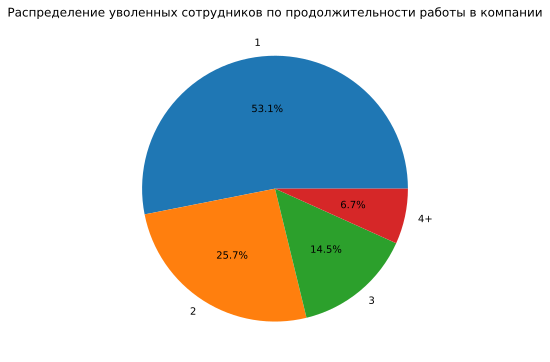

In [99]:
age_counts_quit = df_dismissed['employment_years'].value_counts().sort_index() 
count_4_plus_quit = age_counts_quit.loc[age_counts_quit.index >= 4].sum()
age_counts_quit = age_counts_quit.loc[age_counts_quit.index < 4]
age_counts_quit['4+'] = count_4_plus_quit

age_counts_quit.plot(y='count', kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Распределение уволенных сотрудников по продолжительности работы в компании')
plt.show()

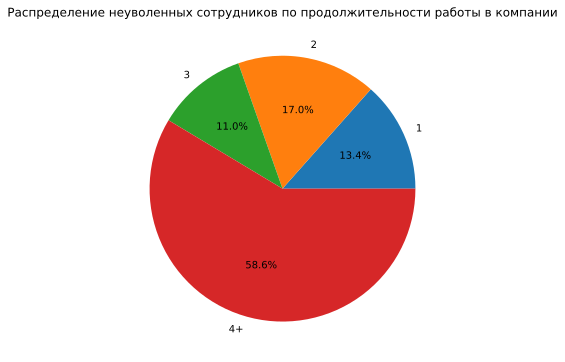

In [100]:
age_counts_not_quit = df_not_dismissed['employment_years'].value_counts().sort_index() 
count_4_plus_not_quit = age_counts_not_quit.loc[age_counts_not_quit.index >= 4].sum()
age_counts_not_quit = age_counts_not_quit.loc[age_counts_not_quit.index < 4]
age_counts_not_quit['4+'] = count_4_plus_not_quit

age_counts_not_quit.plot(y='count', kind='pie', autopct='%1.1f%%', ylabel='')
plt.title('Распределение неуволенных сотрудников по продолжительности работы в компании')
plt.show()

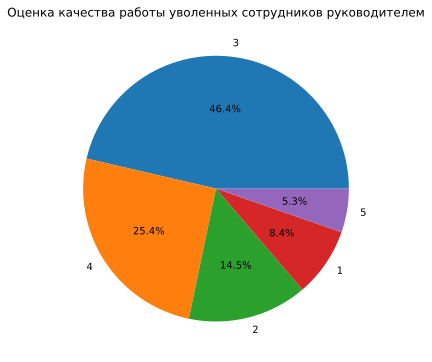

In [101]:
(df_dismissed['supervisor_evaluation']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Оценка качества работы уволенных сотрудников руководителем')
plt.show()

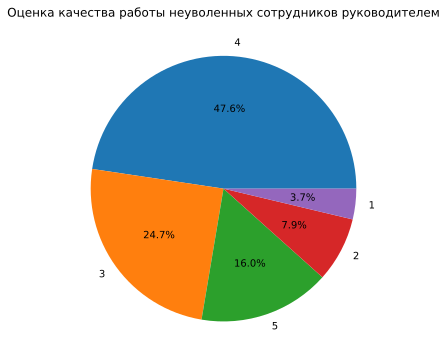

In [102]:
(df_not_dismissed['supervisor_evaluation']
    .value_counts().plot(y='count', kind='pie', autopct='%1.1f%%', ylabel=''))
plt.title('Оценка качества работы неуволенных сотрудников руководителем')
plt.show()

Подытоживая предыдущие выводы, опишем **портрет среднестатистического уволенного сотрудника:**
- с большой вероятностью работает на позиции уровня junior в отделе продаж или технологий;
- ввиду не столь высокой квалификации работает преимущественно с лёгкими и средними по уровню сложности задачами;
- не получал повышения за последний год;
- оценка работы руководителем ~3 (против ~3.6 у неуволенного сотрудника);
- получает зарплату ~24000 (против ~38000 у неуволенного сотрудника);
- проработал в компании ~2 года (против ~4,5 у неуволенного сотрудника).

<div class="alert alert-info"> <b>Комментарий студента v1:</b> Здесь не совсем понял, о чём идёт речь (твой комментарий про то, что нужно проанализировать дискретные признаки с помощью относительных величин). Можешь чуть подробнее объяснить или привести пример? </div>

### Корреляционный анализ

Найдём коэффициенты корреляции между всеми признаками в тренировочном датасете и отобразим их при помощи тепловой карты корреляций:

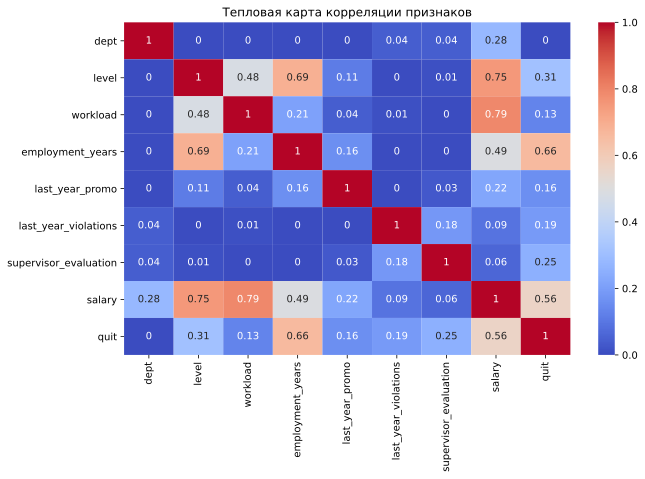

In [103]:
plt.figure(figsize=(10, 6))
sb.heatmap(df_train_2.drop('id', axis=1).phik_matrix(interval_cols=[
    'employment_years', 'supervisor_evaluation', 'salary'
]).round(2), annot=True, vmin=0, vmax=1, cmap='coolwarm')
plot_describe('Тепловая карта корреляции признаков', '', '')

**Промежуточный вывод:**

На основе матрицы корреляций можно судить о сильной корреляции между некоторыми входными признаками (например, между уровнями загруженности и зарплаты), однако явных признаков сильной мультиколлинеарности (0.9 и более) с целевым признаком мы не наблюдаем. 

### Проверка зависимости целевых признаков

В конце концов, попробуем подтвердить или опровергнуть одно из основных утверждений этого исследования. А именно — утверждение о том, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли этот сотрудник. Для этого объединим целевые признаки в один датасет, построим гистограммы зависимости одного признака от другого и найдём среднее значение уровня удовлетворённости для уволенных и неуволенных сотрудников, после чего сформулируем промежуточный вывод этого этапа.

In [104]:
df_dependence = df_test_target.merge(df_test_target_2, on='id', how='left')
df_dependence.head()

id  job_satisfaction_rate quit
0  130604                   0.74   no
1  825977                   0.75   no
2  418490                   0.60  yes
3  555320                   0.72   no
4  826430                   0.08  yes

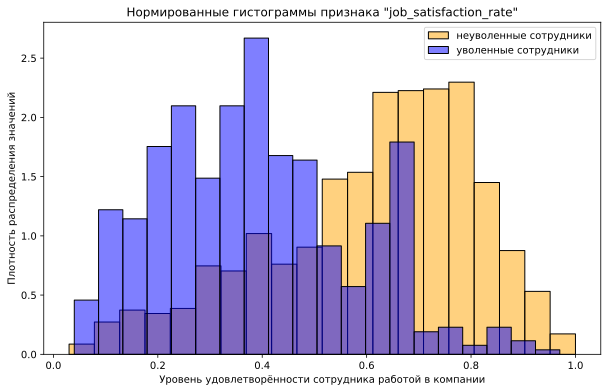

In [105]:
sb.histplot(df_dependence.loc[df_dependence['quit'] == 'no']['job_satisfaction_rate'],
        stat='density', bins=20, common_norm=False, alpha=0.5, color='orange', label='неуволенные сотрудники')
sb.histplot(df_dependence.loc[df_dependence['quit'] == 'yes']['job_satisfaction_rate'],
        stat='density', bins=20, common_norm=False, alpha=0.5, color='blue', label='уволенные сотрудники')
plt.legend(loc='upper right')
plot_describe('Нормированные гистограммы признака "job_satisfaction_rate"',
              'Уровень удовлетворённости сотрудника работой в компании', 'Плотность распределения значений')

In [106]:
print('Средний уровень удовлетворённости уволенных сотрудников:',
      df_dependence.loc[df_dependence['quit'] == 'yes']['job_satisfaction_rate'].mean().round(2))
print('Средний уровень удовлетворённости неуволенных сотрудников:', 
      df_dependence.loc[df_dependence['quit'] == 'no']['job_satisfaction_rate'].mean().round(2))

Средний уровень удовлетворённости уволенных сотрудников: 0.39
Средний уровень удовлетворённости неуволенных сотрудников: 0.61


**Промежуточный вывод:**

Всё указывает на истинность утверждения о влиянии уровня удовлетворённости сотрудника работой на шанс увольнения этого самого сотрудника. Причём мы можем увидеть это как по гистограммам, так и по средним значениям уровня удовлетворённости. 

### Выводы по исследовательскому анализу

1) В рамках исследовательского анализа были выделены две условные группы сотрудников: уволенные (`quit` = 'yes') и неуволенные (`quit` = 'no'). Для данных групп рассмотрены количественные и категориальные признаки. Для количественных признаков построены гистограммы/столбчатые диаграммы и диаграммы размаха, для категориальных — круговые диаграммы.

2) Аномальных значений обнаружено не было. Малочисленные выбросы было решено оставить ввиду объяснимости их природы.

3) На основании выявленных в группах различий можно сделать следующие выводы:
- большинство уволенных сотрудников занимали должности уровня junior и проработали в компании не более трёх лет. Средний размер их заработной платы, как следствие, был также ощутимо ниже, чем у сотрудников оставшихся, а повышение за последний год получил и вовсе только один сотрудник. Загруженность уволенных сотрудников в целом меньше, чем у неуволенных, однако это легко объяснить тем, что большинство из уволенных занимают менее значимые должности и, как следствие, выполняют менее сложные задачи. При этом, количество нарушений среди уволенных выше, что довольно ожидаемо.
- такие признаки как оценка качества работы сотрудника руководителем и принадлежность к тому или иному отделу не выявили заметных различий между рассматриваемыми группами. 

4) На основе матрицы корреляций можно судить о сильной корреляции между некоторыми входными признаками, однако явных признаков сильной мультиколлинеарности (0.9 и более) с целевым признаком мы не наблюдаем. 

5) На основе полученных выводов можно сделать предложения по снижению количества увольнений для руководства компании:
- Во-первых, компании следует обратить внимание на систему наставничества и менторства для новых сотрудников. Наставники могут помочь новичкам в интеграции в команду, обучении и понимании корпоративной культуры. Это может создать чувство принадлежности и поддержки, что важно для удержания на ранних этапах карьеры.
- Во-вторых, необходимо пересмотреть политику карьерного роста и повышения зарплаты. Существующие сотрудники, особенно на позициях junior, должны иметь ясное представление о том, какие требования нужно выполнить для повышения, и какие шаги необходимо предпринять. Регулярные оценки производительности и конструктивная обратная связь помогут сотрудникам понять, как они могут развивать свои навыки и достигать новых высот.
- Третья рекомендация заключается в корректировке объема работы и оценки рабочих процессов, чтобы гарантировать, что задачи для менее опытных сотрудников соответствуют их уровню навыков. Это может включать в себя более четкую делегацию задач, учитывающую загрузку и возможности junior-сотрудников, чтобы снизить вероятность ошибок и нарушений.

## Добавление нового входного признака

Добавим `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи:

In [107]:
df_train_merge = df_train.set_index('id')
df_train_merge.head()

dept   level workload  employment_years last_year_promo  \
id                                                                      
155278       sales  junior   medium                 2              no   
653870          hr  junior     high                 2              no   
184592       sales  junior      low                 1              no   
171431  technology  junior      low                 4              no   
693419          hr  junior   medium                 1              no   

       last_year_violations  supervisor_evaluation  salary  \
id                                                           
155278                   no                      1   24000   
653870                   no                      5   38400   
184592                   no                      2   12000   
171431                   no                      2   18000   
693419                   no                      3   22800   

        job_satisfaction_rate  
id                             
155278                   0.58  
653870                   0.76  
184592                   0.11  
171431                   0.37  
693419                   0.20

Проверим, есть ли схожие `id` работников в тренировочных датасетах:

In [108]:
common_ids = set(df_train_2.index).intersection(set(df_train_merge.index))
print("Общие 'id':", len(common_ids))

Общие 'id': 0


Так как общих `id` нет, то добавить значения `job_satisfaction_rate` напрямую из `df_train` мы не можем. Поэтому предскажем значения `job_satisfaction_rate` для сотрудников из датасета `df_train_2`:

In [109]:
df_train_2_sat = search.best_estimator_.predict(df_train)
df_train_2_sat

array([0.42094133, 0.75493117, 0.16968473, ..., 0.80932763, 0.44459168,
       0.27037963])

In [110]:
df_train_2_ml = df_train_2.copy(deep=True)
df_train_2_ml['job_satisfaction_rate'] = df_train_2_sat
df_train_2_ml.head()

id        dept   level workload  employment_years last_year_promo  \
0  723290       sales  middle     high                 2              no   
1  814010       sales  junior   medium                 2              no   
2  155091  purchasing  middle   medium                 5              no   
3  257132       sales  junior   medium                 2              no   
4  910140   marketing  junior   medium                 2              no   

  last_year_violations  supervisor_evaluation  salary quit  \
0                   no                      4   54000   no   
1                   no                      4   27600   no   
2                   no                      1   37200   no   
3                  yes                      3   24000  yes   
4                   no                      5   25200   no   

   job_satisfaction_rate  
0               0.420941  
1               0.754931  
2               0.169685  
3               0.397069  
4               0.158668

Проделаем аналогичные действия для тестовых датасетов:

In [111]:
df_test_2_ml = df_test_2.copy(deep=True)
df_test_2_ml['job_satisfaction_rate'] = predictions_test
df_test_2_ml.head()

id       dept   level workload  employment_years last_year_promo  \
0  485046  marketing  junior   medium                 2              no   
1  686555         hr  junior   medium                 1              no   
2  467458      sales  middle      low                 5              no   
3  418655      sales  middle      low                 6              no   
4  789145         hr  middle   medium                 5              no   

  last_year_violations  supervisor_evaluation  salary  job_satisfaction_rate  
0                   no                      5   28800               0.800276  
1                   no                      4   30000               0.695717  
2                   no                      4   19200               0.623617  
3                   no                      4   19200               0.670908  
4                   no                      5   40800               0.686414

## Подготовка данных

Скорректируем тренировочную и тестовую выборки:

In [112]:
df_train_2_ml = df_train_2_ml.set_index('id') # Индексируем выборки
df_test_2_ml = df_test_2_ml.set_index('id')
df_test_target_2 = df_test_target_2.set_index('id')

In [113]:
display('Количество дубликатов df_train_2_ml после корректировки:', df_train_2_ml.duplicated().sum())

'Количество дубликатов df_train_2_ml после корректировки:'

2

In [114]:
df_train_2_ml.drop_duplicates(inplace=True, ignore_index=False) # Избавляемся от дубликатов
display('Количество дубликатов df_train_2_ml после удаления:', df_train_2_ml.duplicated().sum())

'Количество дубликатов df_train_2_ml после удаления:'

0

In [115]:
df_X_train_2_ml = df_train_2_ml.drop('quit', axis=1) # Выделяем целевой признак в тренировочной выборке
df_y_train_2_ml = df_train_2_ml['quit']

df_test_2_ml = df_test_2_ml.merge(df_test_target_2, right_index=True, left_index=True)
df_X_test_2_ml = df_test_2_ml.drop('quit', axis=1) # Выделяем целевой признак в тестовой выборке
df_y_test_2_ml = df_test_2_ml['quit']

label_encoder = LabelEncoder() # Кодируем целевой признак
df_y_train_2_ml = label_encoder.fit_transform(df_y_train_2_ml)
df_y_test_2_ml = label_encoder.transform(df_y_test_2_ml)

Для автоматизации машинного обучения (перебора вариантов масштабирования, выбора оптимальной модели и её гиперпараметров) в рамках данного анализа будем использовать пайплайны. Для кодирования категориальных признаков используем `OneHotEncoder` и `OrdinalEncoder`. Обновим пайплайн из первой задачи, добавив новый признак:

In [116]:
num_columns.append('job_satisfaction_rate') # Добавляем новый признак

pipe_final_2 = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

## Обучение моделей

In [117]:
param_grid_2 = [[ # Создаём сетку гиперпараметров для перебора моделей
    { # Словарь для модели DecisionTreeClassifier()
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 21),
        'models__min_samples_split': range(2, 6),
        'models__max_features': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }],

    [{ # Словарь для модели KNeighborsClassifier() 
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(4, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }],
    
        
    [{ # Словарь для модели LogisticRegression() 
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
    }],

    [{ # Словарь для модели SVC()
        'models': [SVC(random_state=RANDOM_STATE, probability= True)],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    }]
]

Наконец, произведём перебор гиперпараметров для каждой модели и выведем результаты в виде таблицы:

In [118]:
models_c = [] # Создаём пустые списки для таблицы результатов 
train_score_c = []
best_score_c = 0

score_table_c = { # Создаём шаблон таблицы результатов
    'model': models_c,
    'cv_roc_auc': train_score_c,
}
 
for grid in param_grid_2: # Создаём цикл для перебора гиперпараметров
    search_c = RandomizedSearchCV(
        pipe_final_2,
        grid,
        n_jobs=-1,
        cv=5,
        n_iter=10,
        scoring='roc_auc',
        random_state=RANDOM_STATE
    )
    
    search_c.fit(df_X_train_2_ml, df_y_train_2_ml) # Обучаем модель
    current_best_model = search_c.best_estimator_['models']
    current_train_score = search_c.best_score_

    models_c.append(current_best_model) # Сохраняем результат итерации
    train_score_c.append(current_train_score)

scoring_table_c = pd.DataFrame(score_table_c) # Выводим таблицу с результатами
scoring_table_c.sort_values(by='cv_roc_auc', ascending=False)

model  cv_roc_auc
3        SVC(C=1, probability=True, random_state=42)    0.921506
0  DecisionTreeClassifier(max_depth=7, max_featur...    0.914696
1               KNeighborsClassifier(n_neighbors=12)    0.911508
2           LogisticRegression(C=8, random_state=42)    0.910598

In [119]:
predictions_test_c = search_c.best_estimator_.predict(df_X_test_2_ml)
predictions_target_c = search_c.best_estimator_.predict_proba(df_X_test_2_ml)[:, 1]
test_score_c = roc_auc_score(df_y_test_2_ml, predictions_target_c)

print(f'Метрика ROC-AUC лучшей модели на тестовой выборке: {test_score_c}')

Метрика ROC-AUC лучшей модели на тестовой выборке: 0.9189194027934176


Проверим модель на адекватность при помощи `DummyClassifier`:

In [120]:
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(df_X_train_2_ml, df_y_train_2_ml)
dummy_model_preds = dummy_model.predict(df_X_test_2_ml)
dummy_model_probas = dummy_model.predict_proba(df_X_test_2_ml)[:,1]
dummy_roc = roc_auc_score(df_y_test_2_ml, dummy_model_probas)
print('ROC-AUC дамми-модели =', round(dummy_roc,2))

ROC-AUC дамми-модели = 0.5


Из этого можем заключить, что наша модель более чем адекватна.

**Промежуточный вывод:**

По итогу перебора моделей и их гиперпараметров лучшей моделью оказалась SVC с параметром С = 1. Метрика ROC-AUC на тестовой выборке составила 0.92, что соответствует заявленному критерию успешности (ROC-AUC > 0.91).

## Анализ важности признаков

Лучшей моделью оказалась SVC, однако она сложна в интерпретации. Поэтому на данном этапе мы рассмотрим степень влияния различных признаков на итоговое предсказание, и найдём те из них, которые вносят наибольший и наименьший вклад:

In [121]:
model_c = search_c.best_estimator_['models']
preprocessor_pipe_c = search_c.best_estimator_.named_steps['preprocessor']
X_train_scalled_c = preprocessor_pipe_c.fit_transform(df_X_train_2_ml)
X_test_scalled_c = preprocessor_pipe_c.transform(df_X_test_2_ml)
feature_names_c = search_c.best_estimator_[:-1].get_feature_names_out()
X_df_c = pd.DataFrame(X_test_scalled_c, columns=feature_names_c)

explainer_c = shap.KernelExplainer(model_c.predict, X_df_c[:10])
shap_values_c = explainer_c(X_test_scalled_c[:10])

  0%|          | 0/10 [00:00<?, ?it/s]

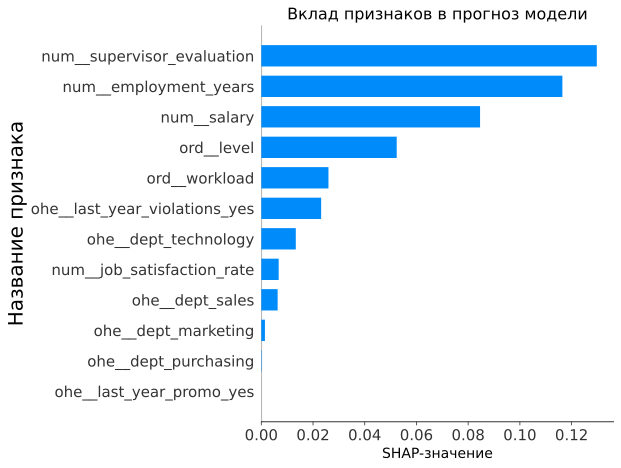

In [122]:
shap.summary_plot(shap_values_c, X_test_scalled_c, feature_names=feature_names_c, plot_type="bar", show=False)

fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=14)
ax.set_title('Вклад признаков в прогноз модели', fontsize=16)
ax.set_xlabel('SHAP-значение', fontsize=14)

cb_ax = fig.axes[0] 
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel('Название признака', fontsize=20)

plt.show()

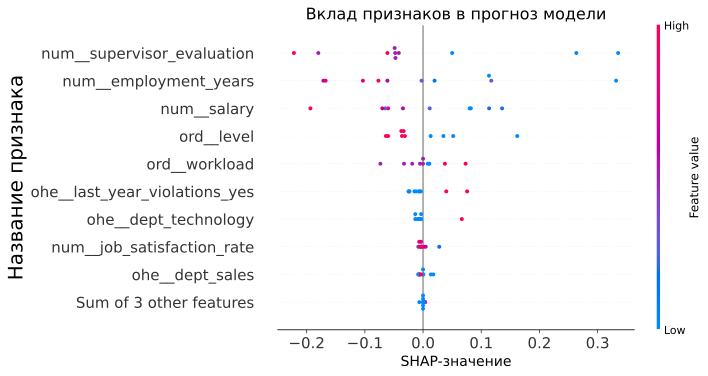

In [123]:
shap.plots.beeswarm(shap_values_c, show=False)

fig, ax = plt.gcf(), plt.gca()

ax.tick_params(labelsize=14)
ax.set_title('Вклад признаков в прогноз модели', fontsize=16)
ax.set_xlabel('SHAP-значение', fontsize=14)

cb_ax = fig.axes[0]
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel('Название признака', fontsize=20)

plt.show()

Наибольший вклад в прогнозирование вносят признаки:
- размер заработной платы;
- длительность работы в компании
- оценка работы сотрудника руководителем.

Наименьший вклад в прогнозирование вносят признаки:
- принадлежность к тому или иному отделу;
- повышение в текущем году;
- наличие нарушений за последний год.

**Промежуточный вывод:**

На данном этапе практически полностью повторились результаты из первой задачи, так что заново формулировать выводы здесь не будем, а подытожим их в финальном разделе.

# Общий вывод

**В ходе работы над проектом были решены две задачи:**
1) Построена модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
Лучшей моделью оказалась SVR с параметром C=4. Метрика SMAPE на тестовой выборке составила 13.6, что соответствует заявленному критерию успешности (SMAPE < 15).

2) Построена модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.
Лучшей моделью оказалась SVC с параметром С = 1. Метрика ROC-AUC на тестовой выборке составила 0.92, что соответствует заявленному критерию успешности (ROC-AUC > 0.91).

Наиболее влиятельными признаками для обеих задач оказались уровень зарплаты и занимаемой должности, а также оценка работы сотрудника руководителем. В связи с этим были выдвинуты предложения по снижению уровня увольнений сотрудников за счёт повышения значимости этих факторов:
1. Улучшение политики оплаты труда — компании стоит пересмотреть систему заработных плат и провести анализ рынка, чтобы зарплаты соответствовали конкурентному уровню, а также ввести систему прозрачных бонусов и премий, связанных с результатами работы.
2. Развитие карьерных возможностей — необходимо создать понятную карьерную лестницу, чтобы сотрудники видели перспективы роста; чётко обозначить условия продвижения по службе, чтобы сотрудники понимали, какие результаты от них ожидаются, а повышения были предсказуемыми и зависящими от объективных показателей.
3. Улучшение обратной связи от руководства. Например, целесообразно введение регулярных встреч сотрудников с руководителями для обсуждения успехов и перспектив.
4. Усиление нематериальной мотивации — разработка программы поощрения лучших сотрудников не только деньгами, но и другими методами (гибкий график, удалённая работа, дополнительные выходные, подарки и т.д.).

**Изначально в данных из проблем можно было выделить только пропуски.**

**В процессе предобработки данных были:**
- Исправлены опечатки в слове "senior".
- Заменены на пропуски значения ' '.

**В рамках исследовательского анализа были:**
- Рассмотрены количественные и категориальные признаки. Для количественных признаков построены гистограммы и диаграммы размаха, для категориальных — круговые диаграммы.
- Аномальных значений не обнаружилось. Малочисленные выбросы было решено оставить ввиду объяснимости их природы. 
- Выдвинуты первые предположения насчёт разницы между сотрудниками с высоким и низким уровнями удовлетворённости, а также между уволенными и неуволенными сотрудниками. Большая часть из этих предположений подтвердилась на этапе анализа важности признаков. 

**Проведён корреляционный анализ, в ходе которого были выявлены типы взаимосвязей различных признаков с целевым.** На основе матрицы корреляций можно судить о сильной корреляции между некоторыми входными признаками, однако явных признаков сильной мультиколлинеарности (0.9 и более) с целевым признаком ни в одной из задач обнаружено не было.

**Для автоматизации машинного обучения (перебора вариантов масштабирования, выбора оптимальной модели и её гиперпараметров) в рамках данного анализа были использованы пайплайны**. Лучшие модели, их параметры и значения рассчитанных на них метрик представлены выше.

Также был составлен **портрет среднестатистического уволенного сотрудника:**
- с большой вероятностью работает на позиции уровня junior в отделе продаж или технологий;
- ввиду не столь высокой квалификации работает преимущественно с лёгкими и средними по уровню сложности задачами;
- не получал повышения за последний год;
- оценка работы руководителем ~3 (против ~3.6 у неуволенного сотрудника);
- получает зарплату ~24000 (против ~38000 у неуволенного сотрудника);
- проработал в компании ~2 года (против ~4,5 у неуволенного сотрудника).

В конце концов, была **доказана истинность утверждения о влиянии уровня удовлетворённости сотрудника работой на шанс увольнения этого самого сотрудника.**